# Air Force Cadet Career Problem Walkthrough

This jupyter notebook demonstrates the implementation of the Air Force Cadet Career Problem (afccp) python module developed and maintained by Griffen Laird for his master's thesis, and now implemented by AFPC/DSYA in the process to match Air Force cadets to their career fields. This notebook showcases the "CadetCareerProblem" object, which defines the family of cadet/AFSC matching problem instances.  

## Contact Info

This project has consumed a lot of my time/focus for the past couple of years both academically (at AFIT) and now operationally (at AFPC) and so I have no problem helping you make sense of all of it! I really mean it, if you ever have any problems with this and you're not sure what to do I highly encourage you to reach out to me through whatever means is easiest for you and I can help. Realistically, the people who'd be reading this tutorial are either at AFPC/DSYA or are working on this problem through some academic setting, meaning there aren't too many people so I have no problem pledging my ability to assist!

Personal email: griffenlaird007@gmail.com
Work email: daniel.laird.4@us.af.mil
Cell #: 8186877221

My preferred means of communication is either via my work email or my cell phone. You'll get a quicker response from me via text message, but my work email is good too. My personal email sometimes gets flooded with random things and I don't always see it all, but I do still check it so don't be afraid to reach me there if you don't want to try the other two options!

## Getting Started

This module's main purpose is to automate as much of the matching process as possible. If we can focus on the general application of solving these problems, there is no reason that AFPC needs to spend so much time each year cleaning data and figuring out how to assign cadets to their AFSCs! That's where afccp comes in.

### Working Directory

To keep things cleaner, I put all executables, this notebook included, in the "examples" folder of the "afccp" project. When we run one of those files, the working directory is initially that subfolder (examples) and so we would only have access to the files and modules within that sub-folder. This isn't going to work, so we need to change the working directory.

In [ ]:
# Import basic libraries
import numpy as np
import pandas as pd
import os

# Obtain initial working directory
dir_path = os.getcwd() + '/'
print('initial working directory:', dir_path)

# Get main afccp folder path
index = dir_path.find('afccp') 
dir_path = dir_path[:index + 6]

# Update working directory
os.chdir(dir_path)
print('updated working directory:', dir_path)

When I am running afccp code, I use a "test.py" script that is located in the root afccp folder. If instead of cloning in afccp, you decided to install it from github (with setup.py), this is more along the lines of how it'd work. The afccp module would operate like a python package and be located in your site-packages folder and so you'd use it within your working directory. Since you've cloned the repo, you can make your own "executables" folder (like "examples") and keep whatever code you build in there. If you do that, all you need to do is run the code above to set the current working directory to the root afccp (project) folder so you can access all afccp modules. 

Here's an example of what my afccp project (and working directory) looks like. The folders circled in yellow will not be included in your project folder at the beginning but will be created when you import "CadetCareerProblem" for the first time. 

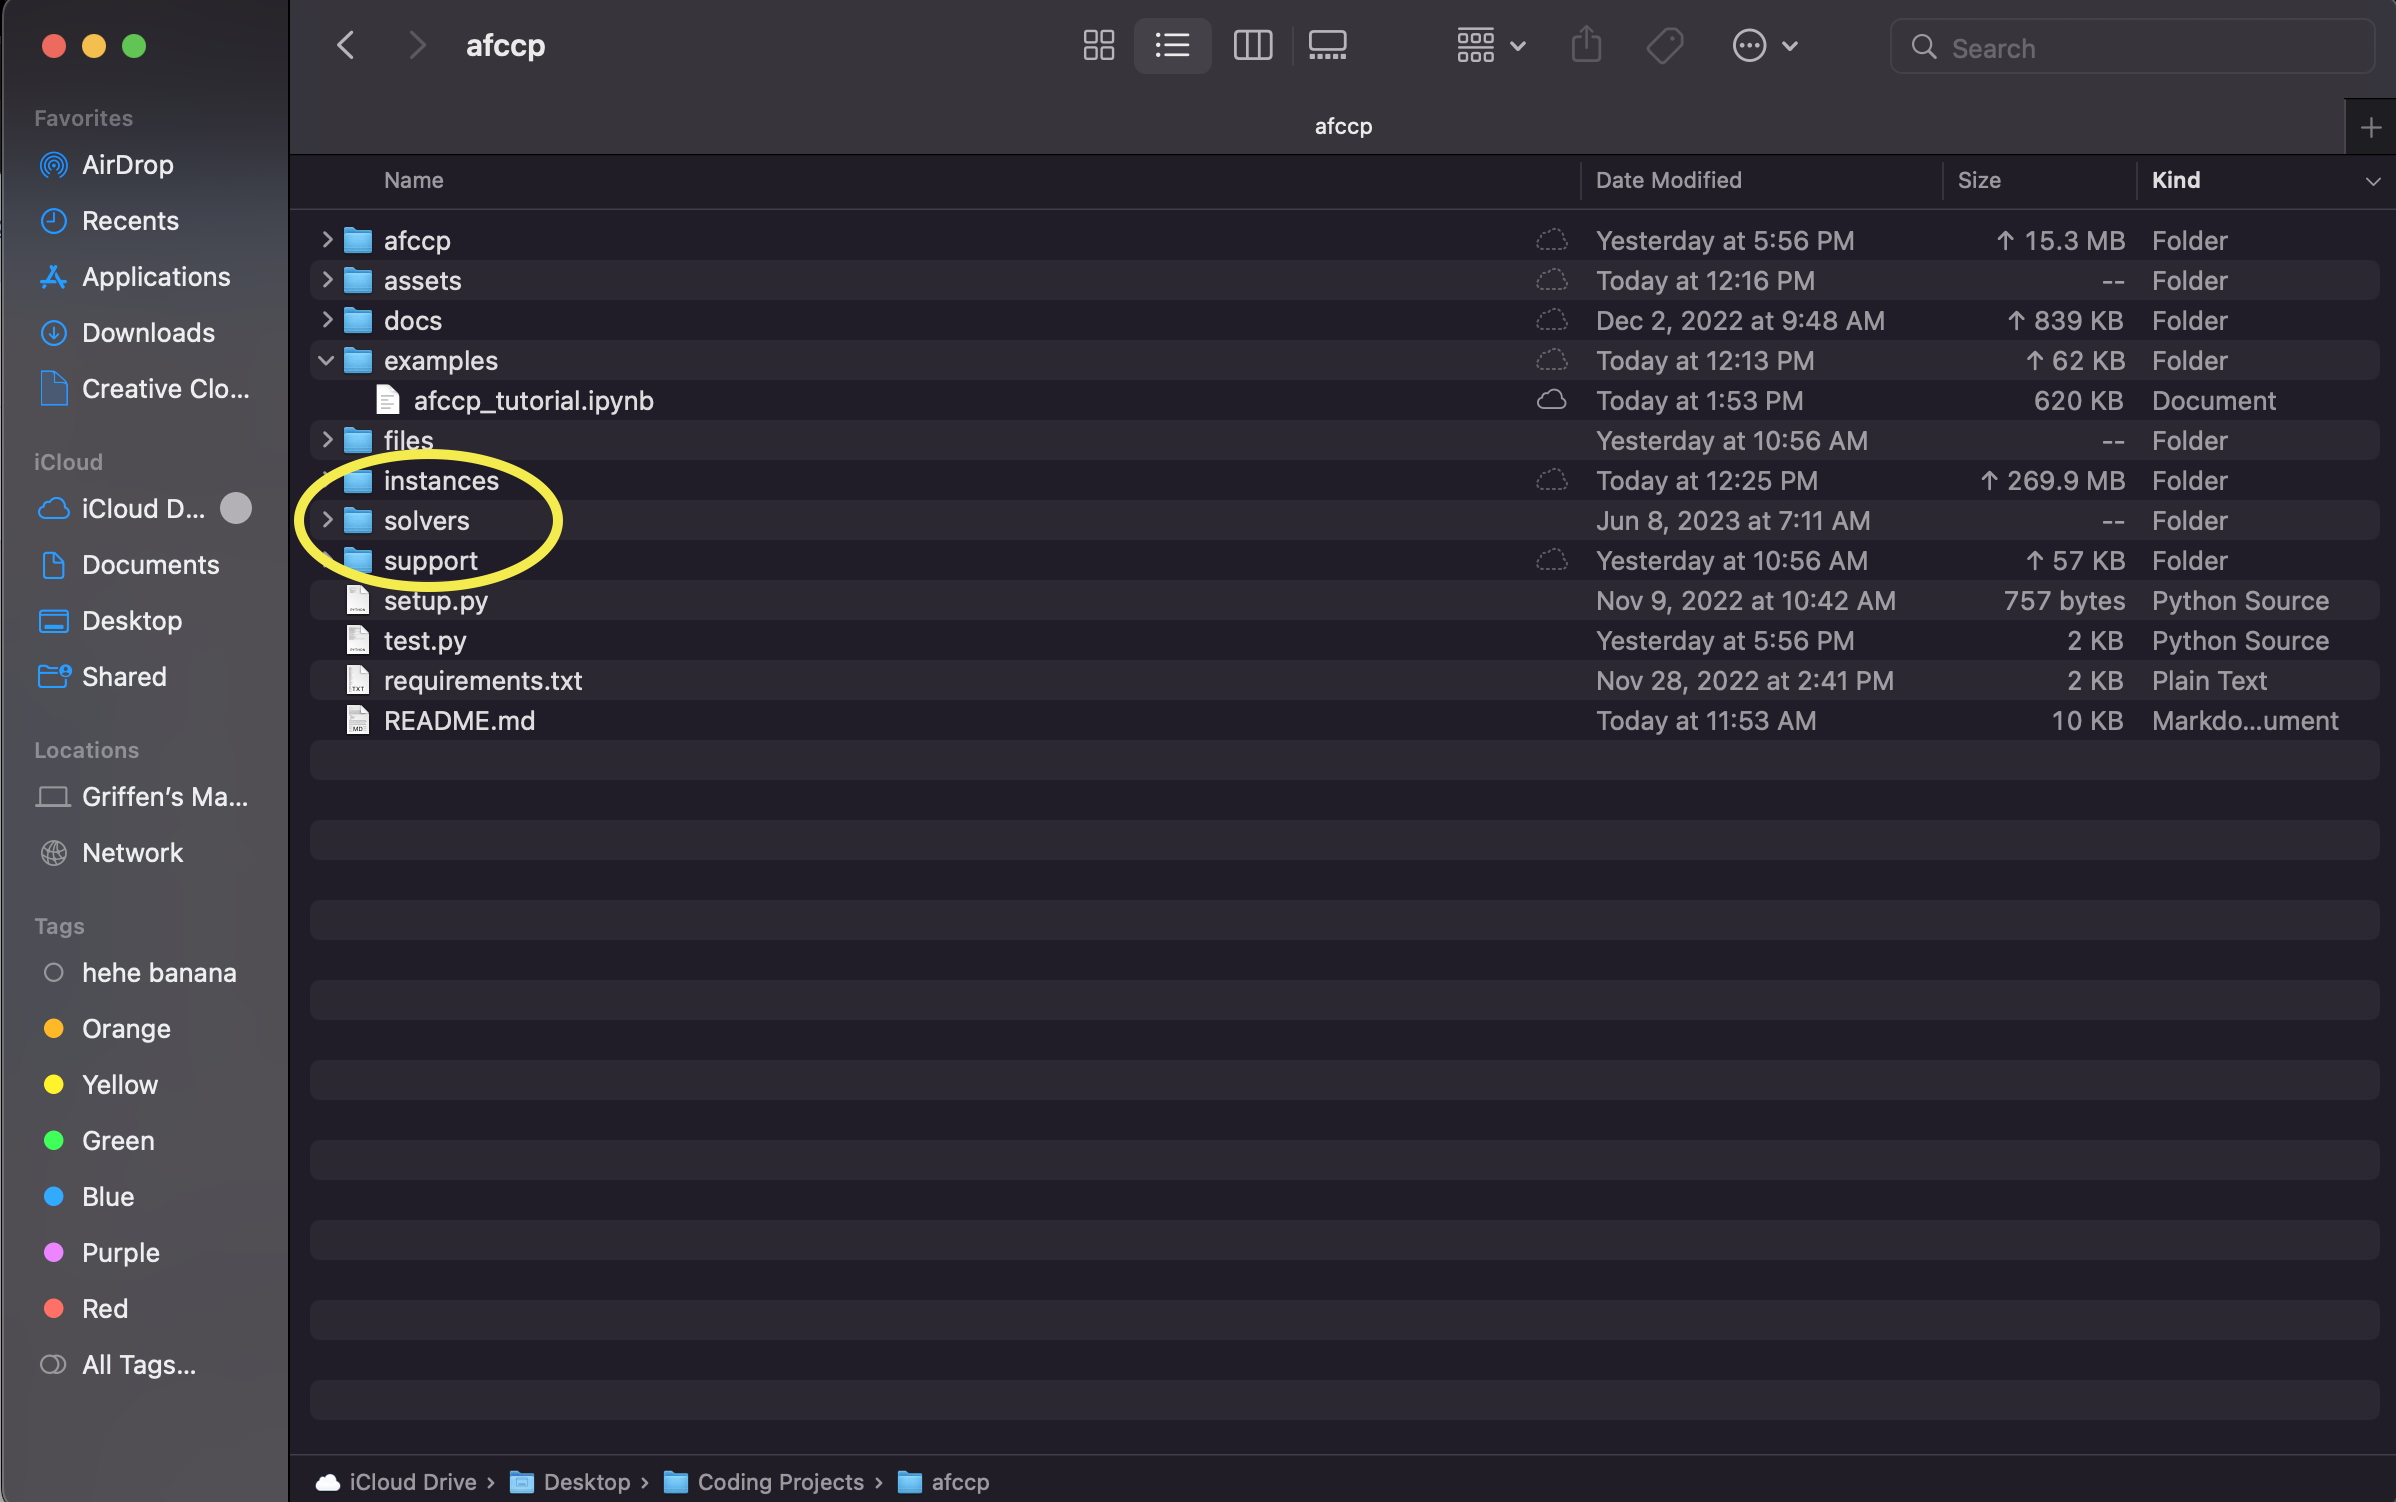

The code below will show you what packages you have (I commented it out for sake of keeping this pdf output shorter). Notably, the main packages I use are numpy, pandas, matplotlib, pyomo, python-pptx, and some others. One easy way of getting all that you need is to install the packages using requirements.txt

In [ ]:
# import sys
# !{sys.executable} -m pip list

The code below will install the packages from the requirements.txt file in the afccp project folder. I commented it out since for me it's just a lot of "Requirement already satisfied" and it also takes up quite a bit of ouput.

In [ ]:
# # Install a pip package in the current Jupyter kernel
# !{sys.executable} -m pip install -r requirements.txt

### Importing the module

Now, you should be able to import "CadetCareerProblem". You can do that like this:

In [ ]:
from afccp.core.main import CadetCareerProblem

I like to include some print statements just to show that the module is working properly (and it checks some of the less popular packages that I use to see if you have them installed because I still want this code to work even if you don't have them). As mentioned previously, the first time you import CadetCareerProblem three folders will be created for you: instances, support, and solvers. The "instances" folder will store all of the data pertaining to the instances of CadetCareerProblem that you'll be working with. The "support" folder will contain the files that apply to all instances and are therefore shared. The "solvers" folder is meant to store pyomo executables which may be useful depending on how you work with pyomo.

If for some reason the code failed and gave you some error saying it doesn't recognize "afccp" as a module, you probably need to add it to the path. You can do that like this: (commented out again)

In [ ]:
# import sys

# print('System path before:', sys.path)
# sys.path.append(dir_path)  # Add the working directory to the path (contains afccp)
# print('\nSystem path after:', sys.path)

That really shouldn't be an issue though since you've already changed the working directory to the root folder. If it's really not working correctly and you don't know why, please let me know and I can certainly assist.

Once you have CadetCareerProblem imported, you should be good to go! The rest of the tutorial pertains to how to use it to its full capacity and how to contribute to it. Whether you're working on this problem academically or operationally (AFPC/DSYA), these tutorials should hopefully help you out!

## CadetCareerProblem

Now that the CadetCareerProblem class is imported, it's time to talk about what it does. This is the main class object that we'll be dealing with. It represents the class of all cadet-AFSC matching problems (various cadet class years). Please note the two different meanings of the word "class" in the previous sentence! Each "instance" of CadetCareerProblem is a distinct academic class year (2019, 2020, 2021, etc.) with various cadet/AFSC parameters. 

Before we get into the data, let's talk about how the code is structured. The class "CadetCareerProblem" lives in main.py (afccp.core.main)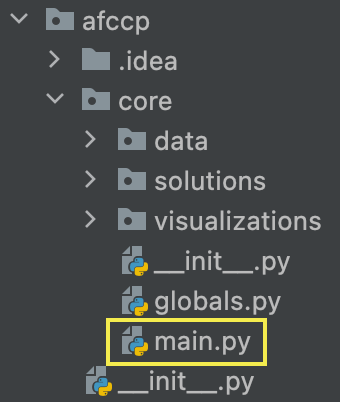

CadetCareerProblem calls all of the other various functions across the "core" module that handle this problem. I've broken up these processes into three categories: "data", "solutions", and "visualizations". The next three sections will discuss these three different concepts in much more detail. For now, let's see what "main" looks like. 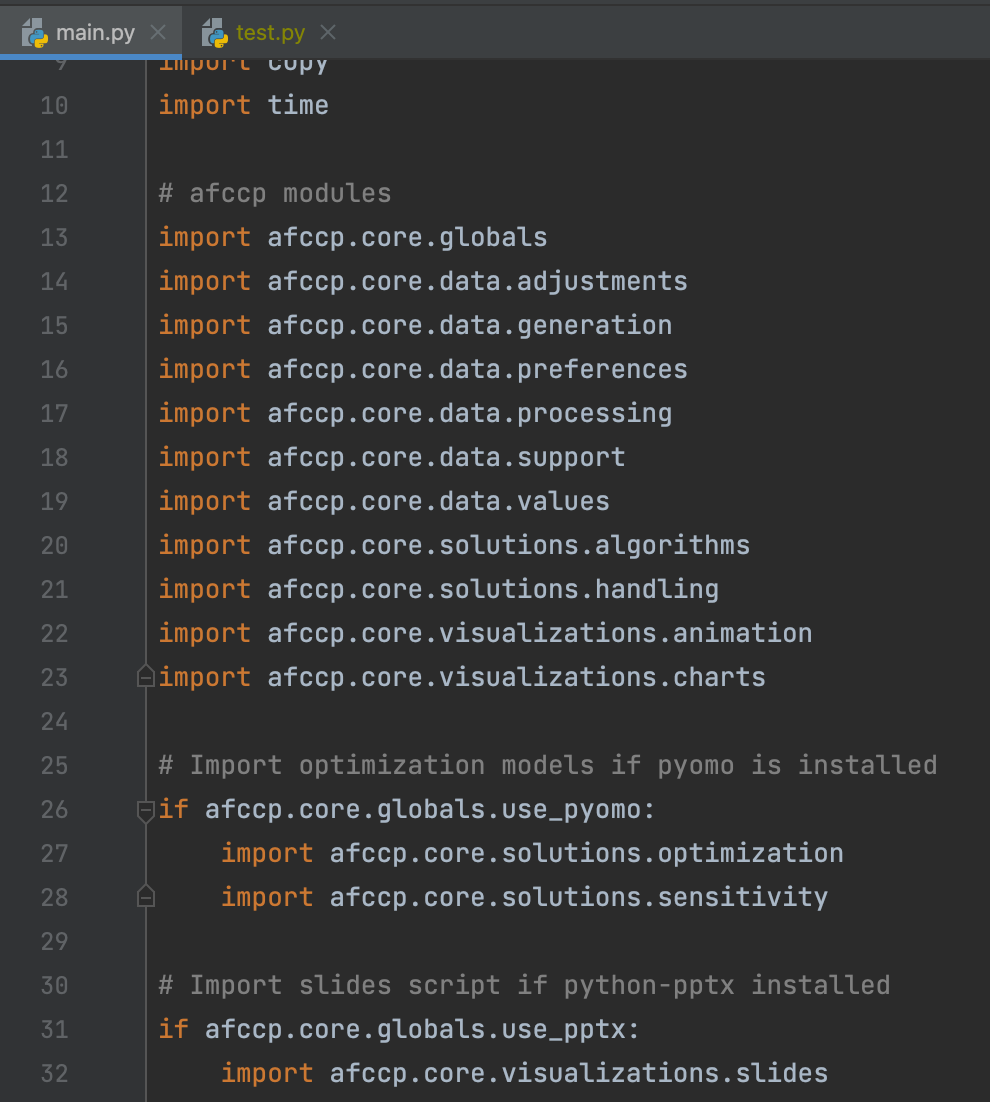

One thing I do across all my .py scripts is import each afccp module directly so that you can see which modules are dependent on each other. All the core scripts get imported directly into "main" since this serves as the hub for all the functionality of afccp. In other scripts, the modules imported are only the ones that are required. Another thing I do for context is include the entire module "path" in front of each function when I call it so that you can see where the function is written. For instance, if I wanted to call the function that defines all of the afccp model hyperparameters ("mdl_p"), I can do so like this:

In [ ]:
# Import the "data.support" module (this would be at the top of the script)
import afccp.core.data.support

# Call the specific function from that script (this example returns a dictionary of default "hyper-parameters")
mdl_p = afccp.core.data.support.initialize_instance_functional_parameters(N=20)  # Requires the number of cadets

# There is a lot of information in here used across afccp
print(mdl_p['figsize'])  # This is the default figure size for my matplotlib plots!

To actually match cadets to their AFSCs, there is a "preprocessing" submodule next to "core" that deals with the real class years that AFPC/DSYA handles. This is why I do have the designation between afccp and core, even though core is currently the only submodule of afccp (it isn't when run operationally!). The intent of the "preprocessing" submodule is to get the data from its source(s) into the correct format to work with CadetCareerProblem. Throughout my code I try to provide decent "docstrings" that describe what that function or object is doing. For example, here's the one for "CadetCareerProblem" itself: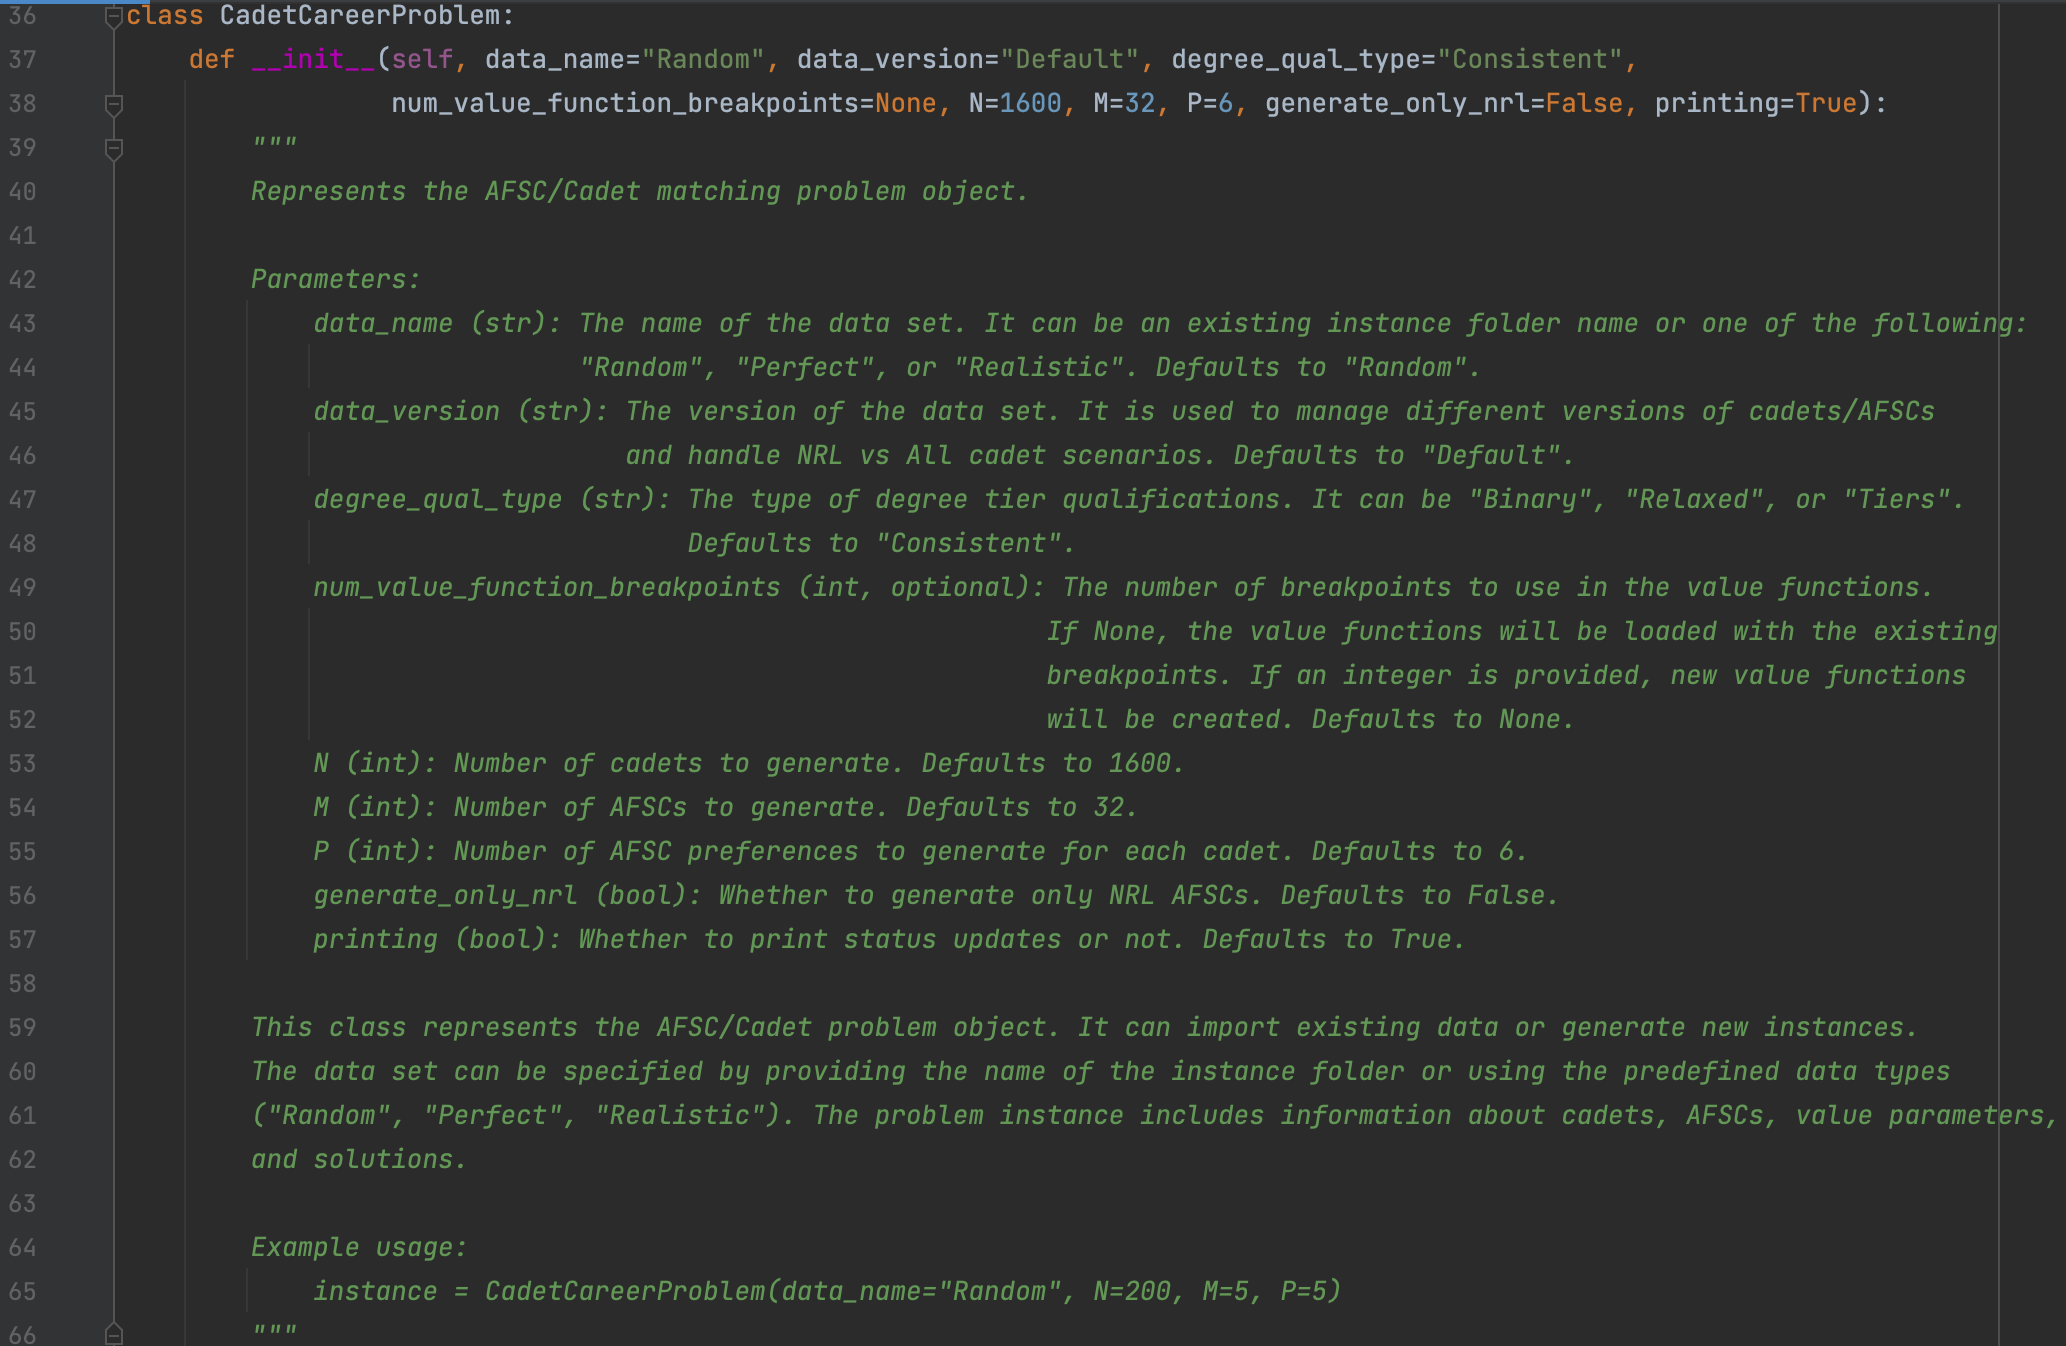

I highly encourage you to read through my code at least to some extent to understand what it's doing. I encourage this for two reasons: to understand how afccp works but perhaps more importantly to understand how python works if you're not as strong of a python coder just yet! A really good way to start, at least in my opinion, is to read through the "__init__" function of CadetCareerProblem (what's shown above). This is the function that gets called as soon as you create an instance of this object (ie. you run "instance = CadetCareerProblem()"). Within that __init__ function I call many other functions from other modules too that you can read if you want a deeper dive into this process. If you're able to follow the flow of the code along and understand, at least to some extent, what it's doing then you'll really be able to understand my structure for afccp.

## Data

A "CadetCareerProblem" instance comes with a lot of data, and so the largest section of this tutorial is here to talk about that data. I'll outline where the data is coming from (the various csvs), how the data is captured within the CadetCareerProblem class, and where the code is that manages all of it. 

### afccp.core.data

The "data" module of afccp.core contains the scripts and functions that all have something to do with processing the many sets and parameters of the problem. At a high level the modules are setup like this: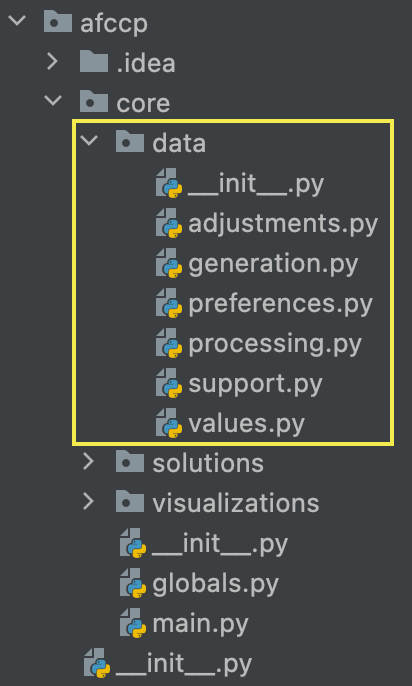

The "adjustments.py" script holds the functions that manipulate the parameters. There is also a function that sanity checks many different sets and subsets of parameters here which is extremely important in avoiding preventable errors. For generating simulated data, "generation.py" contains those functions. Because I ended up making quite a few functions that deal with cadet and AFSC preferences, I took those and put them into "preferences.py". For importing and exporting data, as well as handling some of the file information, we have "processing.py". There are a few functions designated to support CadetCareerProblem and its hyper parameters and whatnot so I put those into "support.py". Lastly, the value parameters, which I will discuss later, are all mostly handled by "values.py".

### Generating data

CadetCareerProblem allows for "fake" class years using simulated data generated through various means. You may or may not have real class year data, but we can generate data to play around with here.

In [ ]:
# Create a randomly generated problem instance with 20 cadets and 4 AFSCs
instance = CadetCareerProblem('Random', N=20, M=4, P=4)

That one line above initializes a new instance of the cadet-AFSC matching problem (CadetCareerProblem). N is the number of cadets, M is the number of AFSCs, and P is the number of preferences the cadets are allowed to express. Originally, cadets could only express six preferences but today they're able to provide complete preference lists. I recommend always making P equal to M. 

The first parameter specified is referred to as the "data_name" of the instance. When generating data, simply write "Random" and the code will determine which instance to generate based on what you currently have in your "instances" folder. Since we haven't generated and exported any data yet, "Random_1" is the instance we create. Note, there won't be a "Random_1" instance folder in your working directory yet since you haven't exported it. I did this purposely so as not to flood your files with instances until you want it and call "instance.export_data()".

The following code is here to manipulate the data I generated to get it into the correct format and ultimately export it back as csvs so I can point to different elements in the code from the data. NOTE: This is purely meant for GENERATED data and I'm doing this so I can export it and then you'll have a generated dataset to import and follow along with as well if you run this code. Don't worry about this just yet. 

In [ ]:
# Fix "Random" data (only meant for generated data!!)
instance.fix_generated_data() 

# Export everything
instance.export_data()

Quick note: the output above doesn't match the Random_1 instance you'll see below because I've run this notebook multiple times and therefore generate different instances that I discard. I'm only referring to the output above, and everything below IS the instance I initially generated. Anyway, just don't worry about it!

Now that we've exported the data (after manipulating it a little), you should have a "Random_1" sub-folder within your "instances" folder!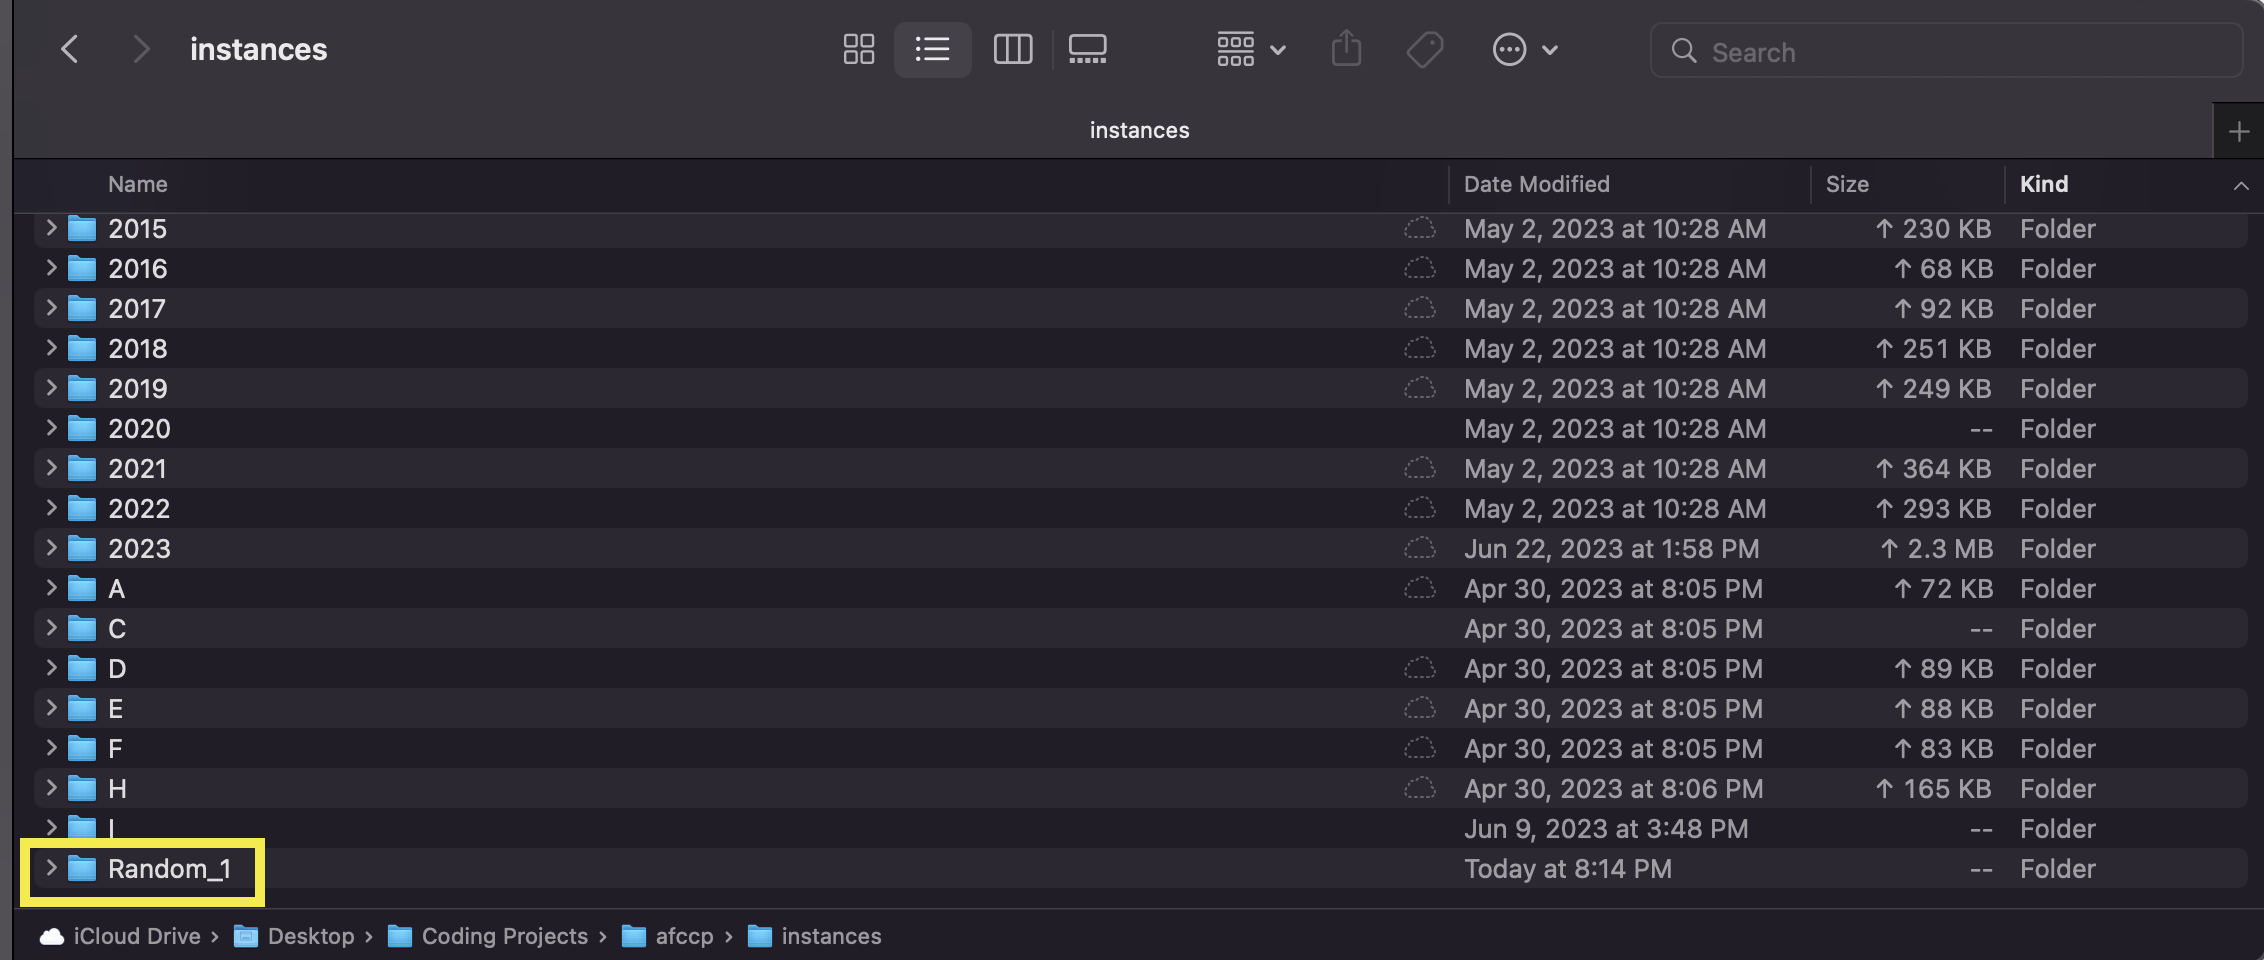

### Instance Folder Structure

You have data now located within the "Random_1" sub-folder. There are 5 instance sub-folders that get created: 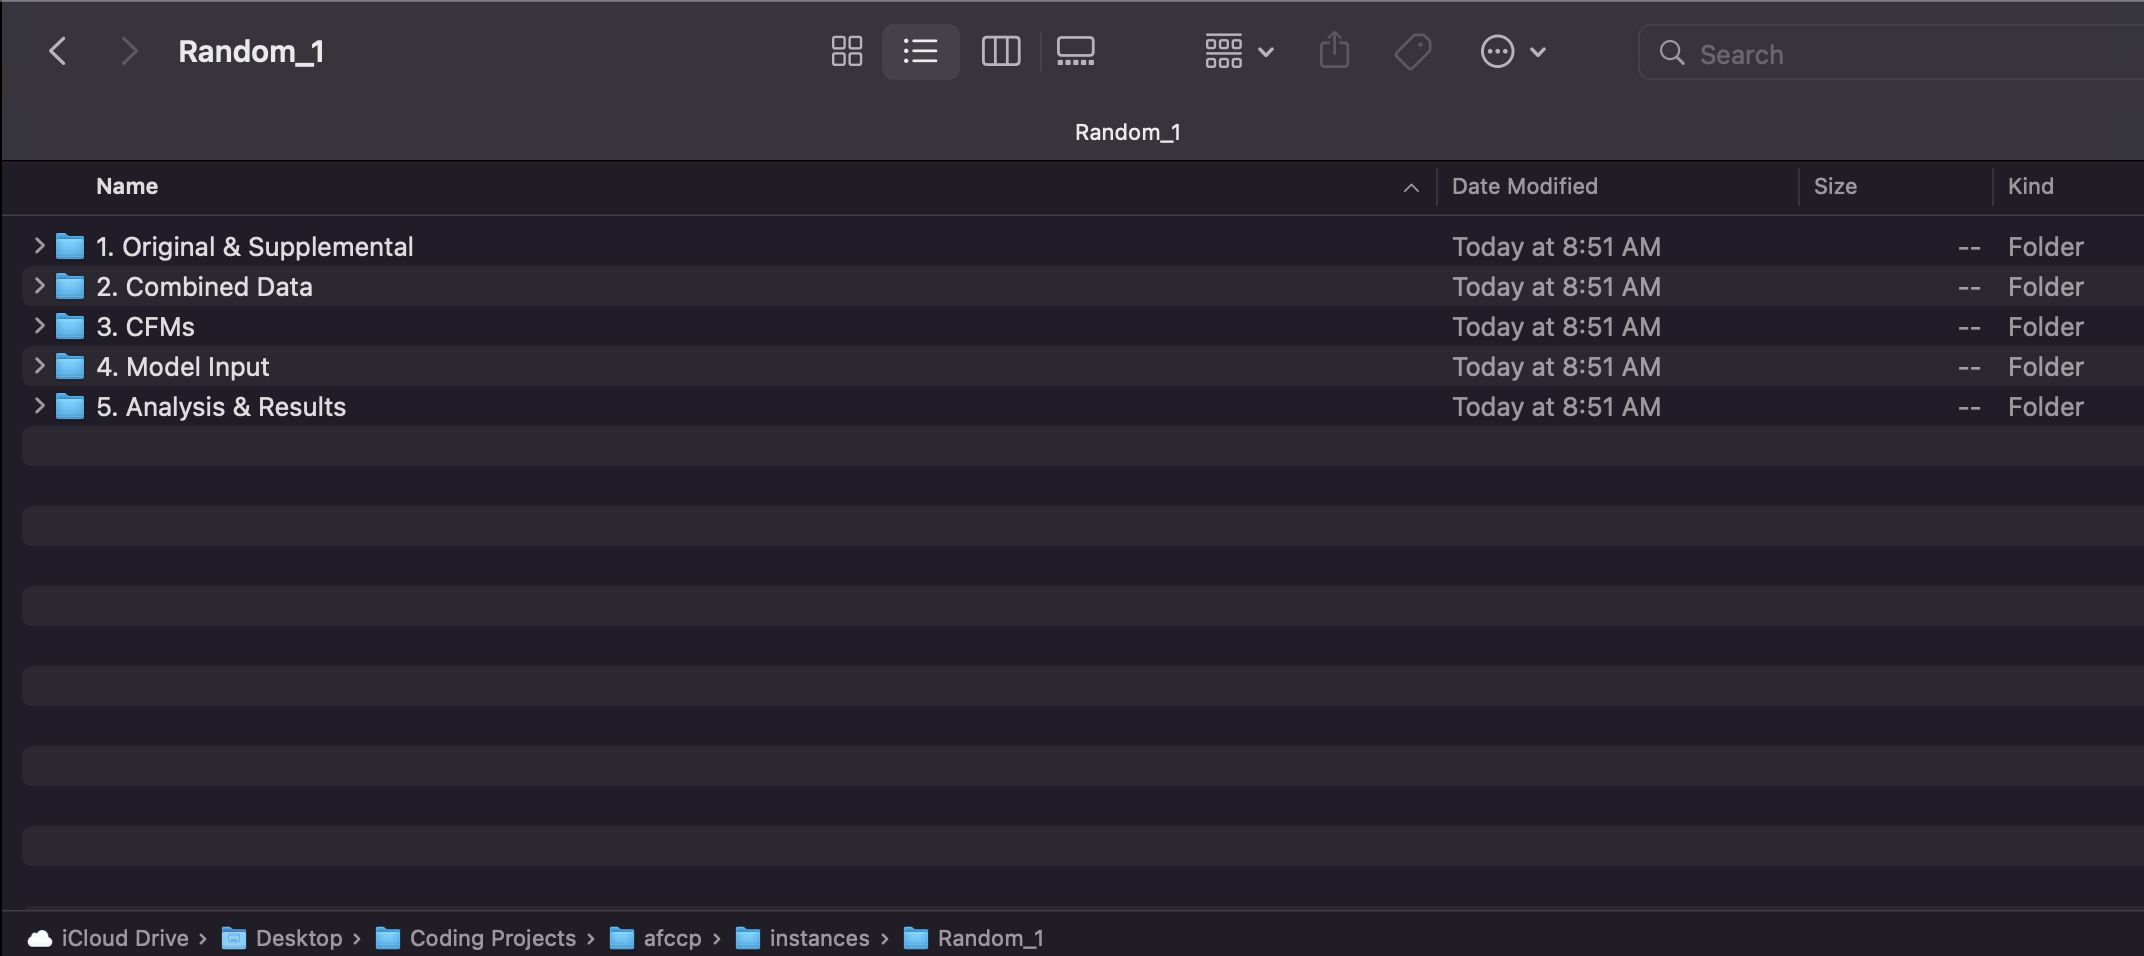 The first 3 all relate to the pre-processing "phases" that AFPC/DSYA goes through to get the data into the problem instance format and are irrelevant for this tutorial. For a real class year of cadets/AFSCs, these 3 sub-folders will be filled with real data in order to get it into sub-folder "4. Model Input".

Since we've generated data, all of these parameters are located in this sub-folder: 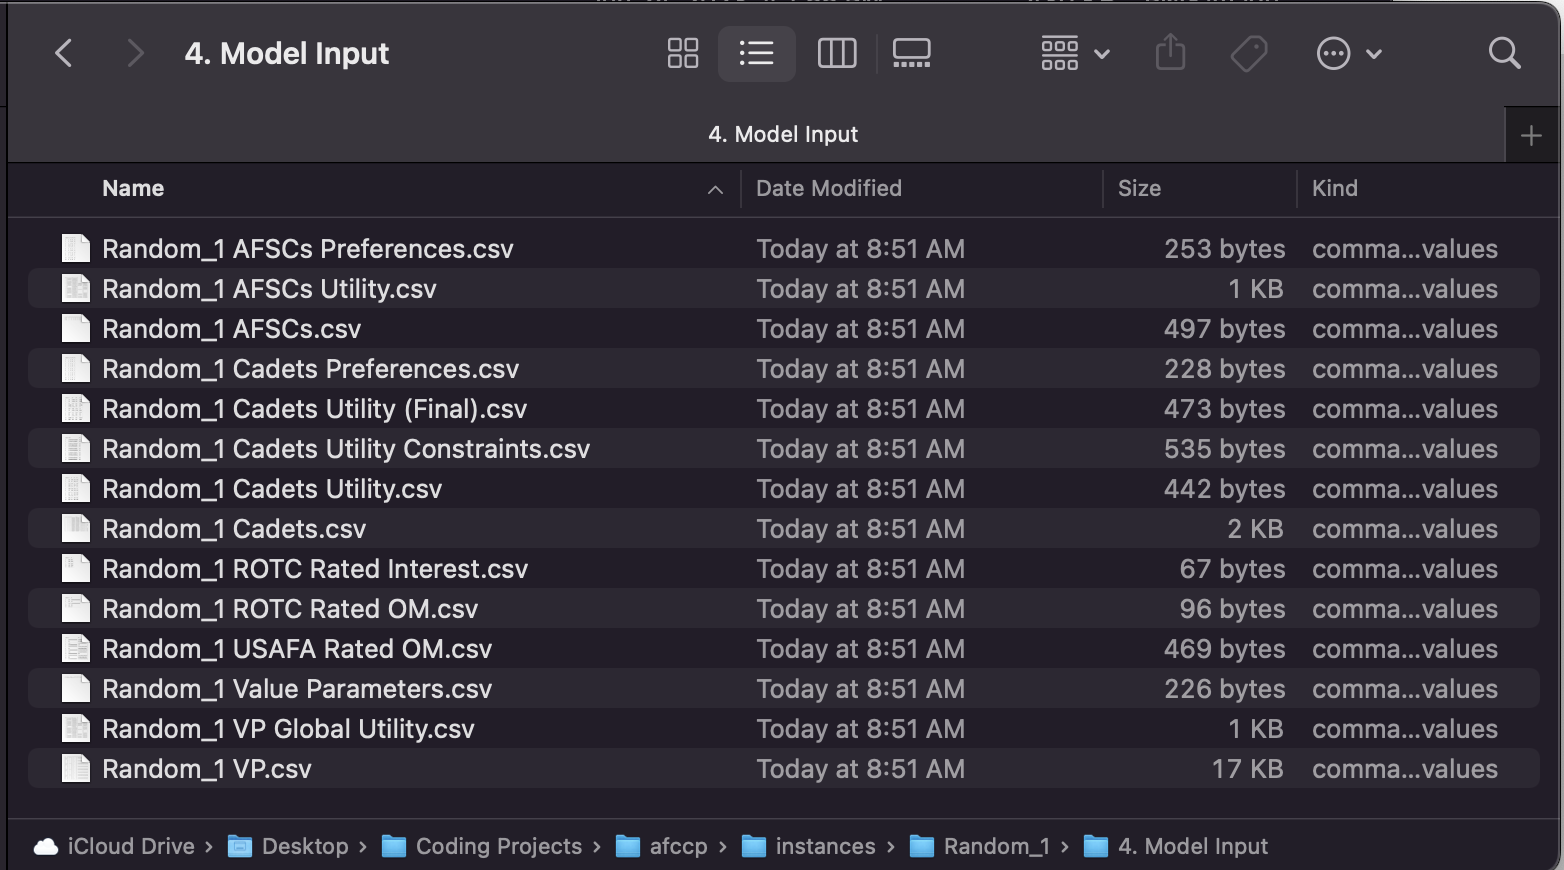

The files shown above, and which you should also have if you're following along, contain all the information stored in the data dictionaries "parameters" and "value_parameters". In a moment I will discuss what that data looks like and how it's stored in this dictionary structure. First, however, let's re-import the "Random_1" problem instance. Note: you already have that instance in memory since we exported it above. I'm just going to show you what it looks like to import it since this is likely what you'll be doing more of anyway.

### Importing data

To import data, it is very simple: specify the "data_name" of the instance you want to import. Here, we will import "Random_1".

In [ ]:
# Import "Random_1" instance
instance = CadetCareerProblem('Random_1')

### "parameters"

We now have a working problem instance. This "instance" object has many different attributes and methods defined that we can now access. The "parameters" of the instance are represented by a dictionary, which is an attribute of the instance object. Various parameters are loaded in as numpy arrays within that dictionary. These are the "fixed" parameters, and contain many different characteristics of this particular dataset. I call them "fixed" parameters because these are the attributes of the problem that the analyst does not have much, if any, control over (the characteristics of the cadets and AFSCs themselves). Let's first discuss the two "primary" datasets: "Cadets.csv" and "AFSCs.csv". 

#### Cadets

"Random_1 Cadets.csv" defines the basic features of the cadets in this problem instance. It looks like this: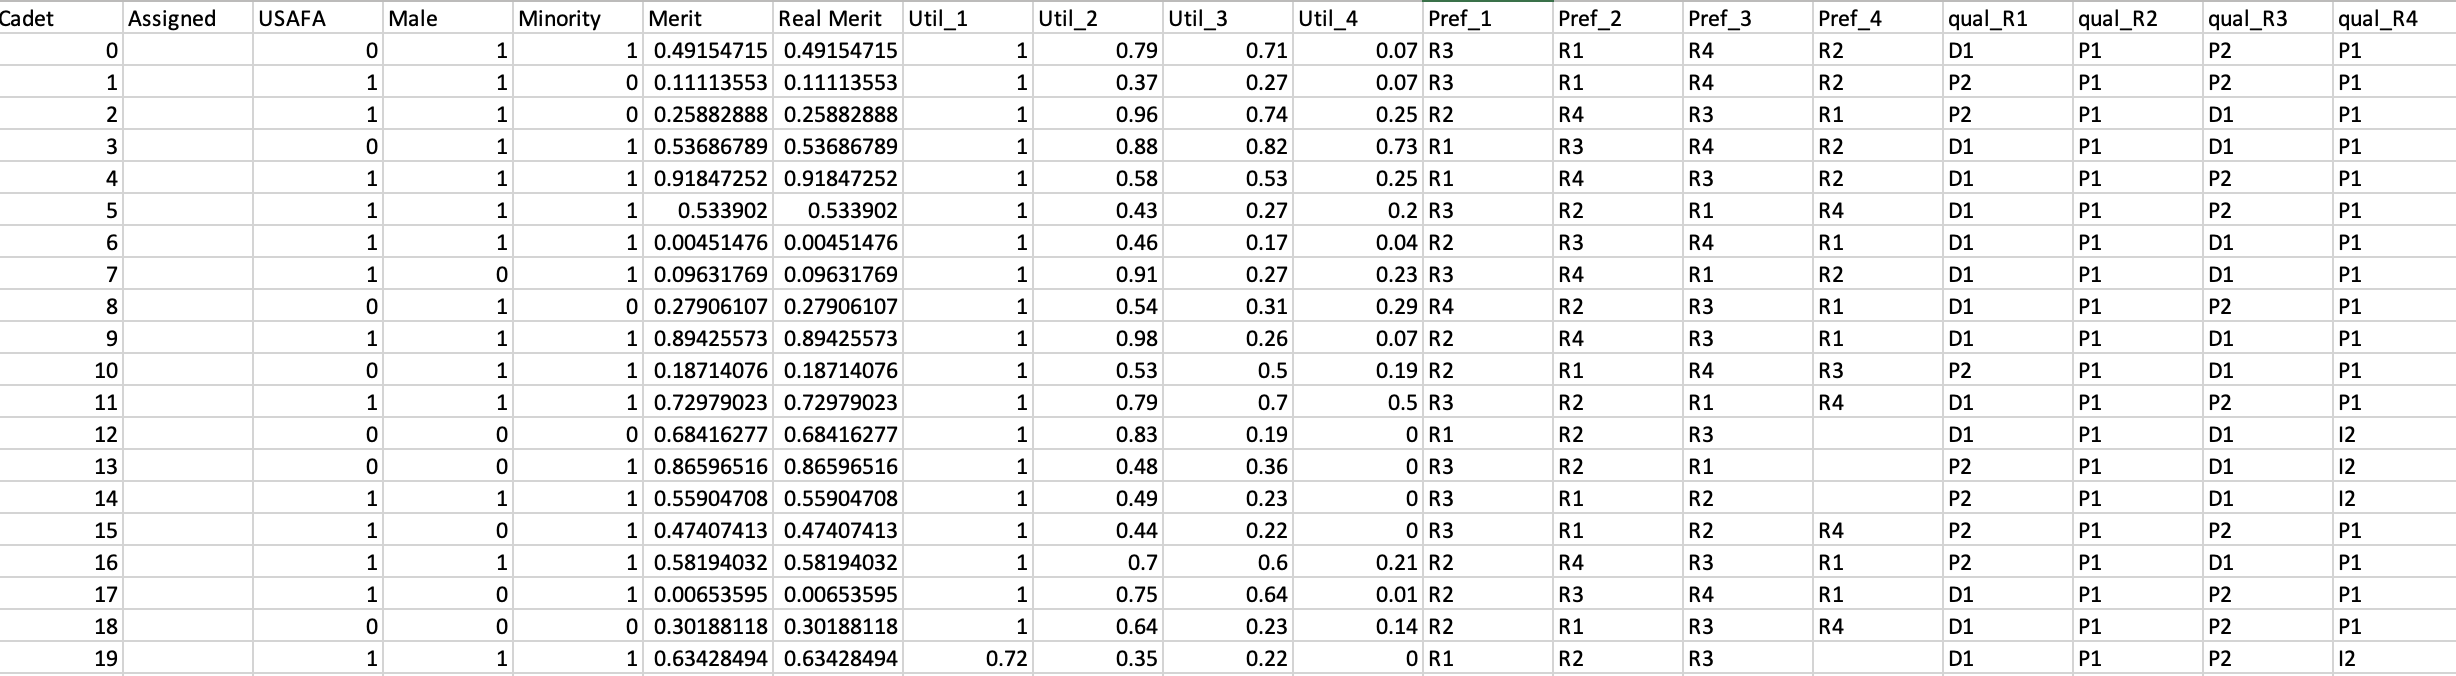

Note: if you're following along, your data will differ from this image since you're generating your own unique set of cadets and AFSCs! We can gain quite a bit of information from this dataset. I will reiterate that data is represented in this module as numpy arrays within certain dictionaries. I extract these arrays from excel using pandas as the dataframe vehicle. Let's go through some of these arrays.

In [ ]:
# Cadet identifier
print("'cadets':", instance.parameters['cadets'])

# Binary USAFA array
print("'usafa':", instance.parameters['usafa'])

# Binary Male array
print("'male':", instance.parameters['male'])

# Binary Minority array
print("'minority':", instance.parameters['minority'])

There are two arrays containing order of merit percentile data. This is because this module used to simply be used for the Non-Rated line. In the NRL process, we re-scaled OM so that it averaged to about 0.50 since the Rated and USSF cadets were not in the mix. This creates two separate OM arrays: the re-sorted OM (merit) and the "real" OM where the cadets ranked among their entire class (merit_all).

In [ ]:
print("'Real' Merit:", instance.parameters['merit_all'])
print("'NRL only' Merit:", instance.parameters['merit'])

You won't see a difference above because this data was generated and I didn't really see a need to differentiate it. Additionally, since AFPC/DSYA is now tasked with matching all cadets (not just NRL), there likely won't need to be a designation in the future so we may go back to just one "Merit" column.

The "Assigned" column contains the AFSCs that may be fixed for certain cadets. Perhaps some cadets were rolled over from the previous AFSC and had already been awarded an AFSC. In those cases, we want to count them within our calculations but don't want to change their assigned AFSC. Again, since this is generated data, it does not play much of a role.

In [ ]:
# Array of already awarded AFSCs for each of the cadets
instance.parameters['assigned']  # Empty array!

The "Util_1" -> "Util_4" columns indicate the "utilities" that the cadets have placed on their first, second, third, and fourth choice AFSCs. The "Pref_1" -> "Pref_4" columns indicate the ordered list of AFSC choices the cadets provided. Capturing the preference data in this manner (rows are cadets & columns are the choices) is the way we've always "initially" represented it. I will show later in the "Preferences" section that we can convert them into another useful representation of the data where the rows are still cadets but the columns are the AFSCs themselves. 

In [ ]:
# Utility cadet columns shown in numpy arrays
print('Cadet Utilities\n', instance.parameters['c_utilities'])

# Preference cadet columns shown in numpy arrays
print('\nCadet Preferences\n', instance.parameters['c_preferences'])

The last cadet has a utility < 1 as their first choice by coincidence since this is generated data. A real class year should have all 1s in their first choice.

The last section of data contains the degree qualifications! Qualifications for AFSCs are currently determined by the Air Force Officer Classification Directory (AFOCD). Each AFSC provides a tiered list of degree groups (tiers 1, 2, 3, etc.) as well as a requirement level for that degree tier ("Mandatory", "Desired", "Permitted). In some cases, the AFSC also has an implied "Ineligible" tier. M, D, P, and I are the letters representing the four kinds of tiers shown in the qualification matrix below. The numbers correspond with the tier itself (1, 2, 3, ...).

In [ ]:
instance.parameters['qual']

#### AFSCs

Like cadets, AFSCs are also defined in a separate csv file (Random_1 AFSCs.csv) which looks like this: 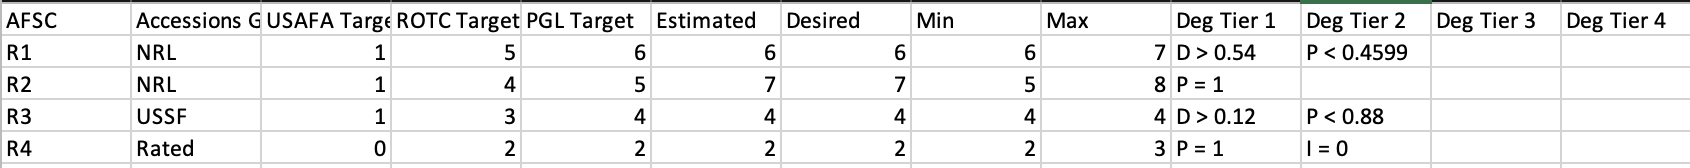

Here we have 4 AFSCs, and each has its own set of unique characteristics.

In [ ]:
# Array of AFSC names
print(instance.parameters['afscs'])

One thing to note is the extra AFSC "*". This represents the "unmatched" AFSC since we can have partial solutions where not all cadets go matched (think Rated) or in certain algorithms we may simply leave cadets unmatched. By allowing this extra AFSC at the end we can still evaluate these kinds of solutions. As a result, we do have certain parameters where we add a column at the end for this unmatched AFSC. One example is the cadet utility matrix below. For context, this matrix represents the same information captured in "c_utilities" only this time the columns are sorted by AFSC order, not the preference order.

In [ ]:
# Utility matrix (cadet submitted)
print(instance.parameters['utility'])

Note the extra column of zeros at index 4. There are 4 AFSCs (0, 1, 2, 3) but we make an extra for the unmatched AFSC (always at the end!).

When we generate random data, and if we have at least 4 AFSCs, I make sure I generate at least one AFSC from each of the three "accessions groups": Rated, USSF, NRL. You can track which AFSCs are in which group here:

In [ ]:
# "Accessions Groups", and their associated AFSCs, represented in this instance:
instance.parameters['afscs_acc_grp']

In [ ]:
# Indices of AFSCs in each accessions group
for grp in instance.parameters['afscs_acc_grp']:
    param = "J^" + grp
    print(param, instance.parameters[param])

The next 7 columns all refer to the quantities of cadets assigned to the AFSCs. The USAFA and ROTC "targets" are taken from the Production Guidance Letter (PGL) produced by A1PT. These outline how many new lieutenants need to be produced from both sources of commissioning.

In [ ]:
# Number of USAFA cadets needed for each AFSC
print('USAFA:', instance.parameters['usafa_quota'])

# Number of ROTC cadets needed for each AFSC
print('ROTC', instance.parameters['rotc_quota'])

These numbers are largely ignored since the real goal is meeting the combination of the two targets. If we were strict on meeting these quotas for both sources of commissioning it would be very challenging and result in a worse outcome for everyone. Therefore, the main PGL target we shoot for is aptly named "PGL Target"

In [ ]:
# Real quota of cadets needed for each AFSC
instance.parameters['pgl']

The "Estimated" and "Desired" numbers of cadets are both used purely in the Value-Focused Thinking (VFT) model. The VFT model, as it stands, is non-linear and non-convex since there is a variable divided by another variable in the objective function. For example, the "average merit" calculation for a particular AFSC $j$ is: 

$\frac{\sum_{i \in \mathcal{I}} merit_i \cdot x_{ij}}{\sum_{i \in \mathcal{I}} x_{ij}}$ 

Because it is non-linear, I created an "approximate" model where I approximate the number of cadets using some estimated number -> hence, the "Estimated" parameter! The "Desired" parameter is fed into the quota value function which I will discuss later on. 

In [ ]:
# Estimated number of cadets for each AFSC (Used in objective function as denominator for certain objectives)
print("Estimated:", instance.parameters['quota_e'])

# Desired number of cadets for each AFSC (same as above because it's fake data)
print("Desired:", instance.parameters['quota_d'])

Because the PGL target only provides one data point, I still need to have a range on the number of cadets that can be assigned. This is where the minimum and maximum quantities are used (lower and upper bounds on the number of cadets to be assigned). 

In [ ]:
# Minimum number of cadets that can be assigned to each AFSC
print('Minimum:', instance.parameters['quota_min'])

# Maximum number of cadets that can be assigned to each AFSC
print('Maximum:', instance.parameters['quota_max'])

The "Deg Tier" columns contain the data on the target proportions of degrees from each tier requested for the AFSCs. This information is gathered into the value parameters that will be discussed later on.

In [ ]:
instance.parameters['Deg Tiers']

#### Parameter "Additions"

From this initial set of data, we can derive more parameters and sets to use in the various models.

In [ ]:
# Numbers of Cadets, AFSCs, and AFSC preferences
for param in ['N', 'M', 'P']:
    print(param + ':', instance.parameters[param])

In [ ]:
# Sets of cadets and AFSCs (indices)
for param in ['I', 'J']:
    print(param, instance.parameters[param])

My sets of cadets and AFSCs ($\mathcal{I}$ and $\mathcal{J}$) are numpy arrays of indices since this allows for more flexibility than just using AFSC/cadet names since we can access other arrays using those indices through the power of numpy.

In [ ]:
# Set of cadets that are eligible for AFSC at index 3 (R4)
print('cadet indices', instance.parameters['I^E'][3])

In [ ]:
# Set of AFSCs that the cadet at index 14 is eligible for
print('AFSC indices', instance.parameters['J^E'][14])

In [ ]:
# Names of the AFSCs that the cadet at index 14 is eligible for
print("AFSC Names:", instance.parameters['afscs'][instance.parameters['J^E'][14]])

In [ ]:
# USAFA cadets
print("USAFA cadets", instance.parameters['usafa_cadets'])

# ROTC cadets
print("ROTC cadets", instance.parameters['rotc_cadets'])

I have a dictionary $I^D$ which contains the cadets with certain demographics that are also eligible for the various AFSCs. Many of these sets and subets are discussed in my thesis too which are potentially better defined there: https://apps.dtic.mil/sti/pdfs/AD1172355.pdf

In [ ]:
# The keys to the "I^D" dictionary are the objectives for the AFSCs that deal with demographics of the cadets
print(instance.parameters['I^D'].keys())

The objectives above are a subset of the possible AFSC objectives $\mathcal{K}$ and are used with the value parameters that I will discuss in a later section!

In [ ]:
# Cadets with Tier 2 degrees that are eligible for the AFSC at index 3 (R4)
print("Cadets:", instance.parameters['I^D']['Tier 2'][3])

In [ ]:
# USAFA Cadets with Tier 2 degrees that are eligible for the AFSC at index 3 (R4)
usafa_cadets_with_tier_2_degrees_afsc_r4 = \
    np.intersect1d(instance.parameters['I^D']['Tier 2'][3], instance.parameters['usafa_cadets'])
print("Intersection:", usafa_cadets_with_tier_2_degrees_afsc_r4)

In [ ]:
# The OM of those cadets
print('Merit', instance.parameters['merit'][usafa_cadets_with_tier_2_degrees_afsc_r4])

#### Preferences

Cadet preferences, as well as AFSC preferences now, are provided as numpy arrays of shape (NxM) with an extra column for cadet preferences for the unmatched AFSC (like the utility matrix shown earlier). Let's discuss cadet preferences first. There are multiple csv files containing information on cadet and AFSC preferences. 

##### Cadet Preferences
For cadets, there is the "utility" matrix I depicted earlier which is contained in "Random_1 Cadets Utility.csv": 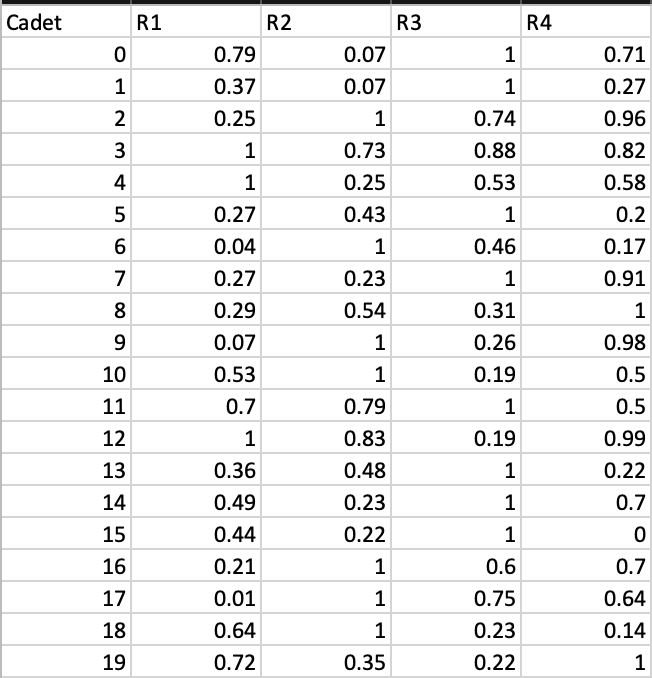

NOTE: Your numbers will be different if you're following along with this tutorial in your own jupyter notebook! (Data was randomly generated!). As you can see, the data is the same as was printed from "instance.parameters['utility']" above. The picture will not match your output, however, if you regenerate this data. If I want to access Cadet 4's utility for the AFSC at index 2 (R3), I can do so like this:

In [ ]:
instance.parameters['utility'][4, 2]

Remember, python index starts at 0! This "utility" matrix is meant to represent the cadet's reported utility for the AFSC they receive. Here's a little history on this real problem:

Up until FY24, cadets were allowed to express 6 preferences for NRL AFSCs and assign utility values to each. This was the extent of their input to the process, and the optimization model just used those utility values. Ties are allowed and are regularly provided by cadets by expressing multiple 100% utilities for their top however many choices. Often 0s were also expressed signaling the cadets lack of desire for a given AFSC (even within their top 6). 

For the FY24 class, cadets rank ordered all 47 AFSCs (I know- yikes!) and were allowed to express utility values on their top 10 choices (same rules as before). This essentially creates two separate matrices: 'c_pref_matrix' and 'utility'. "Random_1 Cadets Preferences.csv" contains this preference matrix:

In [ ]:
instance.parameters['c_pref_matrix']

NOTE: this matrix takes on the same format as before where the rows are the cadets and the columns are the AFSCs (NOT the "choice" of the cadets; the matrix cell values are the rank that the cadet put on that AFSC column). Cadet 0, for example, ranks AFSC "R3" first followed by "R1" then "R4" then "R2". The "0"s represent an AFSC that is not on a cadet's preference list. I will touch on the concept of "eligibility" later, but this effectively means that this cadet cannot be matched to this particular AFSC. Once we have the "c_pref_matrix", we can then convert it to an ordered list of AFSCs for each cadet. I have that piece as a dictionary where the keys are the cadets and the values lists of AFSC indices in order of the cadet's ranking of them:

In [ ]:
instance.parameters['cadet_preferences']

Cadet 0's preferences in order with AFSC names:

In [ ]:
cadet_0_afsc_indices = instance.parameters['cadet_preferences'][0]

# Ordered list of AFSC names for cadet 0
instance.parameters['afscs'][cadet_0_afsc_indices]

So, for FY24 since I had a "utility" matrix only containing information on the cadet's top 10 choices and also a "c_pref_matrix" with the ordinal rankings the cadets gave, I had to reconcile the two to represent the most accurate amount of information. I couldn't just use one or the other since both had valuable information. I combine them by converting ordinal rankings (1, 2, 3, 4, 5) to a continuous 1 -> 0 scale (1, 0.8, 0.6, 0.4, 0.2). I then average this matrix with the cadet-provided utility matrix to create a new matrix I conveniently name "cadet_utility". This is located in "Random_1 Cadets Utility (Final).csv". 

In [ ]:
instance.parameters['cadet_utility']

Based on the method of collecting cadet preference data for FY24 I didn't want to assume cadets were really indifferent between their top 2 choices if they provided a utility of "1" for both. They still chose to sort them somehow, and so by taking the average of the two matrices I ensure a strictly decreasing utility function for each cadet. 

##### AFSC Preferences

In FY24, AFSCs have preferences on cadets now too! This, I do believe, is here to stay so it's worth discussing here. For the Non-Rated Line AFSCs, we actually met with all of the Career Field Managers (CFMs) to discuss what was important to them in their officers. They provided their input and "1-N" lists were created for each of their respective AFSCs. For Rated, each Source of Commissioning (SOC) acted as the CFM and their specific order of merit (OM) lists were used as the 1-Ns. I will touch on the Rated OM data momentarily. The Space Force did a similar thing for their AFSCs. This is all captured in the "Random_1 AFSCs Preferences.csv" file in a very similar manner as the "Cadets Preferences" version. Now, each column contains an AFSC's ranking for each cadet:

In [ ]:
instance.parameters['a_pref_matrix']

Again, 0s represent cadets that are not on the AFSC's list. In the exact same manner I mentioned previously with converting cadet ordinal rankings (1, 2, 3, 4, 5) to a continuous scale (1, 0.8, 0.6, 0.4, 0.2), we do that with AFSCs to get the "afsc_utility" matrix located in "Random_1 AFSCs Utility.csv":

In [ ]:
instance.parameters['afsc_utility']

Also in the same manner as cadets, we have a separate dictionary of ordered cadets for each AFSC:

In [ ]:
instance.parameters['afsc_preferences']

In the above, the AFSC at index 0 (R1) has cadet 4 ranked #1 and cadet 1 ranked #20.

Just to confirm that these lists are the "sorted indices" of "a_pref_matrix", you can look at both the utilities and rankings of the cadets using "afsc_preferences" as the indices to sort on. We'll use AFSC 'R1' as an example:

In [ ]:
j = 0  # Index of "R1"
sorted_indices = instance.parameters['afsc_preferences'][j]
print('Ordered cadets:', sorted_indices)
print('Rankings on these cadets:', instance.parameters['a_pref_matrix'][sorted_indices, j])
print('Utilities on these cadets:', instance.parameters['afsc_utility'][sorted_indices, j])

There you have it as far as cadet and AFSC preferences go! I will soon discuss why eligibility is important as it directly relates to who is or is not on each of the lists. First, let's discuss the rated OM situation

##### Rated OM

Currently, each SOC provides their own rated OM lists that we need to combine. The lists for ROTC and USAFA are located in "Random_1 ROTC Rated OM.csv" and "Random_1 USAFA Rated OM.csv", respectively. 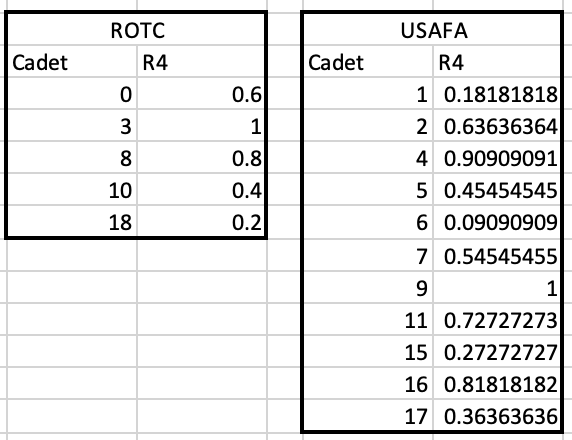

NOTE: In this problem instance we have only one rated AFSC: "R4". One of the reasons I like using cadet indices as identifiers (rather than some other ID or name) is for this example right here. I can extract the indices of the rated cadets from both SOCs directly from these matrices:

In [ ]:
instance.parameters['Rated Cadets']

Once I have that, I can look at whatever other features I want to see from these cadets. For example:

In [ ]:
# General Order of Merit
indices = instance.parameters['Rated Cadets']['rotc']
print('GOM', instance.parameters['merit'][indices])

# Preference of the rated ROTC cadets for the one rated AFSC (R4)
print('Cadet preference on R4', instance.parameters['c_pref_matrix'][indices, 3])

Since both of these lists for R4 are relative to each SOC, we can combine them like we do with general OM. We convert to "percentiles" relative to the SOCs and then zipper them together. I have a method that does this: "construct_rated_preferences_from_om_by_soc". It takes these two matrices and then zippers them together where the final "product" is an updated "a_pref_matrix" and "afsc_preferences". 

Let's demonstrate the "zippering" (again, this may not be accurate if you're re-running all of my code since R4 may not be a rated AFSC in your instance!):

In [ ]:
j = 3 # R4

# Alternating USAFA/ROTC cadets based on proportions of both SOCs in R4's list
sorted_indices = instance.parameters['afsc_preferences'][j]
print('Binary USAFA array:', instance.parameters['usafa'][sorted_indices])
print('Ordered Cadet List:', sorted_indices)

#### Eligibility/Qualifications

One thing I've alluded to in several areas before is the concept of eligibility. Certain cadet/AFSC pairings cannot happen. Rated eligibility is determined by medical qualifications and volunteerism. Space Force eligibility is determined by degree qualifications and volunteerism. NRL AFSC eligibility is a combination of degree qualifications and the new CFM rankings via the AFSC preferences. The intent for them was to open the door to more people potentially being eligible for certain career fields based on factors beyond academic degrees.

The degree "qual" matrix outlines the tier of degree that each cadet has but it also signals which cadets are eligible or not for each of the AFSCs. For rated, everyone is a "P" unless you're not eligible (see below for "R4").

In [ ]:
# Degree Qualification matrix (AFOCD)
print(instance.parameters['qual'])

In [ ]:
# Embedded eligibility matrix
print(instance.parameters['eligible'])

In the age of wanting to try matching algorithms, preferences on both sides (cadets and AFSCs) must agree. This means that if you're on one AFSC's preference list, that AFSC must be on your preference list too. Essentially, this creates three separate eligibility sources (cadet preferences, afsc preferences, and the qual matrix). All three of these need to match up. This is why I have one method of CadetCareerProblem that "ensures" this is true: instance.remove_ineligible_choices(). This is a fairly aggressive approach since all it does is check if you're ineligible according to one source, and if you are it removes you from all other sources to force ineligibility. If you're doing this for real data, make sure you know what you're doing! Here's the code I have in the "instance.fix_generated_data()" method when I remove these choices to show what you need to do afterwards to get the data looking right:

In [ ]:
# Removes ineligible cadets from all 3 matrices: degree qualifications, cadet preferences, AFSC preferences
instance.remove_ineligible_choices()

# Take the preferences dictionaries and update the matrices from them (using cadet/AFSC indices)
instance.update_preference_matrices()  # 1, 2, 4, 6, 7 -> 1, 2, 3, 4, 5 (preference lists need to omit gaps)

# Convert AFSC preferences to percentiles (0 to 1)
instance.convert_afsc_preferences_to_percentiles()  # 1, 2, 3, 4, 5 -> 1, 0.8, 0.6, 0.4, 0.2

# The "cadet columns" are located in Cadets.csv and contain the utilities/preferences in order of preference
instance.update_cadet_columns_from_matrices()  # We haven't touched "c_preferences" and "c_utilities" until now

No changes are made because I've already done this earlier!

#### Note on parameters

To drive home the idea that my "parameters" dictionary is an attribute of the problem instance I've been writing "instance.parameters" up until this point. In most of my functions within afccp, however, I convert "instance.parameters" to "p" for sake of typing less which I highly encourage you to do when writing your own functions.

In [ ]:
# Shorthand example
p = instance.parameters
p['afscs']

In [ ]:
# "Accessions group" for each of the Four AFSCs
p['acc_grp']

There are plenty of other parameters attached to this dictionary too that you can explore. I need to write a better documentation file on them but for now you can view them in the keys of the parameter dictionary.

In [ ]:
# Parameter keys
p.keys()

### "value_parameters"

The value parameters contain all the data on the weights, values, and constraints that the analyst controls on the problem. Eventually, however, I hope that the other stakeholders will control their pieces of this puzzle (ie. their weights/values for the aspects of this problem that affect them). The more data we have on what everyone cares about the more we know what to look for, and the more we can provide sensitivity analysis on to show why the solution is the way it is.

#### Defaults

The first thing I want to talk about here is the "default value parameters". I have a method in CadetCareerProblem to generate value parameters which is made exclusively for simulated data. Since that is the instance we are working with, we have already done that (it happens in "instance.fix_generated_data()"). This set of value parameters exists in our "vp_dict" but we haven't actually activated it yet. My code works with the idea that you could have different sets of things you care about, and when you solve the model with one set of value parameters you could solve it again with a different set. Let's see what this looks like:

In [ ]:
# List of sets of value parameters
print(instance.vp_dict.keys())

# Current "activated" value parameters (we haven't told CadetCareerProblem to activate any yet!)
print('VP dictionary:', instance.value_parameters, 'VP Name:', instance.vp_name)

We need to activate this set of value parameters, which we can do like this:

In [ ]:
instance.set_value_parameters()  # Defaults to grabbing the first set in the list

print('VP Name:', instance.vp_name)

One of the things we can do is export the current set of value parameters as "defaults" back to excel. That is what I do here:

In [ ]:
instance.export_value_parameters_as_defaults()

This set of value parameters nows exists in it's "default" form in your afccp/support/value parameters defaults/ folder! I add a "New" to the end of the name purely as a way to ensure you don't unintentionally overwrite your previous set of default value parameters: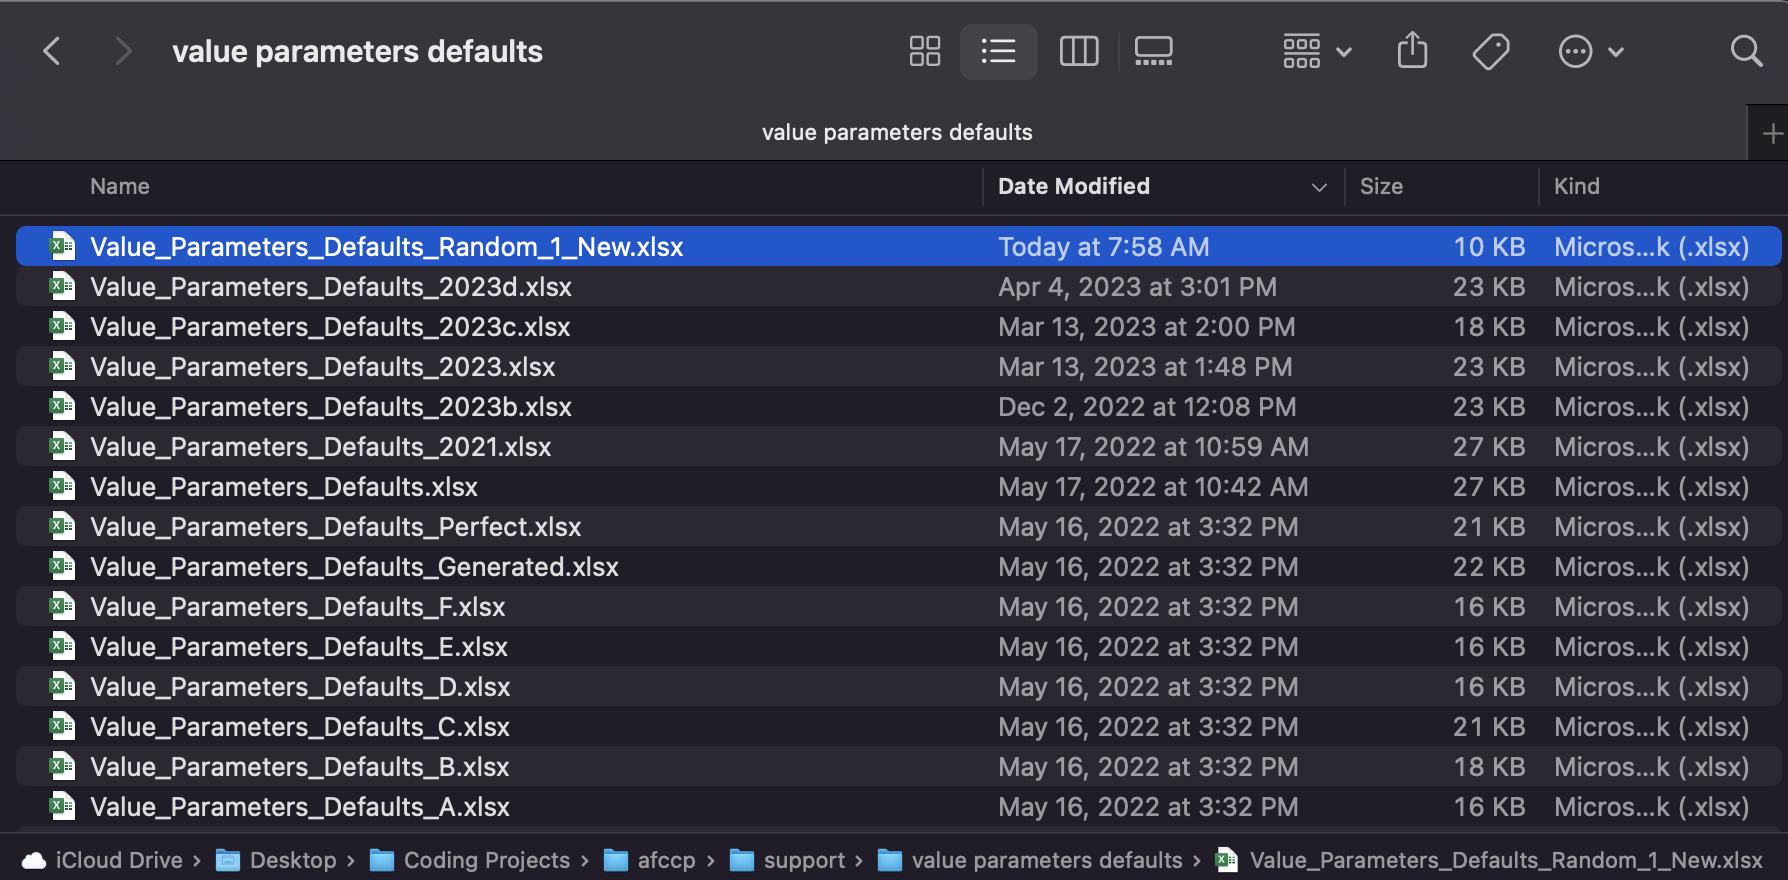

Simply go in and manually change the name to "Value_Parameters_Defaults_Random_1.xlsx" (again, the "New" thing is because I don't want you to accidentally overwrite the real one if applicable!). Once you've done that, we can import this set of value parameters as "defaults" rather than generating random ones like we did at the beginning for this simulated dataset! 

In [ ]:
v = instance.import_default_value_parameters()  # I add the "v = " because there's a lot of output otherwise

There are two reasons I'm having you import the value parameters as defaults above: to show you how can initialize a set of value parameters for an instance from excel (rather than generating random ones), and also to show that I have a nifty function that checks if a new set of value parameters is really "new". What I mean by that is if you acquire a new set of value parameters by importing defaults, ideally it should only be added as a new one if it really is a unique set of parameters. You already had a set of value parameters "VP", and now you've just imported a new one so you should have "VP2". However, you'll still only see "VP" in your list because the two were identical:

In [ ]:
# Only one set of value parameters found for this instance
instance.vp_dict.keys()

Now that we have our value parameters imported, I want to take a moment to describe the various components. I'm going to do this by using the "Value_Parameters_Defaults" excel file as a reference. Remember, these are the "defaults" that get imported for a particular problem instance that then turn into the actual set of value parameters used. I will do my best to explain the differences and where they're both located. Let's start by importing each dataframe from that file to convey these ideas:

In [ ]:
import openpyxl

# File path
filepath = dir_path + "support/value parameters defaults/Value_Parameters_Defaults_Random_1.xlsx"

# Load workbook and get sheet names
wb = openpyxl.load_workbook(filepath)
sheet_names = wb.sheetnames

# Load in dataframes from each separate excel sheet
dfs = {}
for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

#### "Overall" value parameters

The first dataframe I'll show contains the information for the "big toggles" on the value parameters:

In [ ]:
dfs["Overall Weights"]

Once initialized for the "Random_1" problem instance, these highest level settings are stored in "Random_1 Value Parameters.csv" in the "Model Input" folder. This dataframe controls the overall settings for each set of value parameters. It's also what tells afccp the names of the different sets of value parameters as well. Right now, we only have one set ("VP").

In [ ]:
# Shorthand
p = instance.parameters
vp = instance.value_parameters

print("Current value parameter set name:", instance.vp_name)

# Overall weights on Cadets/AFSCs
print('\nCadets Overall Weight:', vp['cadets_overall_weight'])
print('AFSCs Overall Weight:', vp['afscs_overall_weight'])

# If we want to constrain the overall values on Cadets/AFSCs (we won't, but it's here)
print('\nCadets Overall Minimum Value:', vp['cadets_overall_value_min'])
print('AFSCs Overall Minimum Value:', vp['afscs_overall_value_min'])

For the "individual" weight on each cadet relative to all other cadets (and vice versa for AFSCs), we use weight functions. For cadets, their weights are based on their order of merit. In my random set of data, the cadet weight function initialized is "Curve_1". 

In [ ]:
# Cadet weight function
vp['cadet_weight_function']

Here, cadet weight is a "sigmoid" function of their order of merit. I can illustrate the weight function by plotting cadet weight versus their OM:

In [ ]:
chart = instance.display_weight_function({"square_figsize": (8, 8), "dpi": 80})

Now, the percentiles for a real class will be uniformly distributed between 0 and 1. This is a fake class of 20 cadets and so they were randomly selected between 0 and 1 which is why the graph looks a little weird. The y-axis shows the "swing weights" for the cadets. Swing weights simply mean that they've been scaled so the biggest value is 1 and all other weights are relative to that one. "Local" weights, by contrast, sum to 1 collectively. I've printed out the differences below and you can see how I calculate them:

In [ ]:
print("Merit", np.around(p['merit'], 3))
print("\n'Local' Weight", np.around(vp['cadet_weight'], 3), "Local Weight Sum:", np.around(np.sum(vp['cadet_weight']), 3))
print("\n'Swing' (Scaled) Weight", np.around(vp['cadet_weight'] / np.max(vp['cadet_weight']), 3))

We can also change the weight function through afccp if we want to.

In [ ]:
# Linear function of OM (not very "forgiving" to low OM cadets)
instance.change_weight_function(cadets=True, function="Direct")
chart = instance.display_weight_function({"square_figsize": (8, 8), "dpi": 80})

In [ ]:
# Cadets are equal no matter what their OM is
instance.change_weight_function(cadets=True, function="Equal")
chart = instance.display_weight_function({"square_figsize": (8, 8), "dpi": 80})

In [ ]:
# Exponential curve (not recommended since it puts heavy emphasis on top performers)
instance.change_weight_function(cadets=True, function="Exponential")
chart = instance.display_weight_function({"square_figsize": (8, 8), "dpi": 80})

In [ ]:
# Sigmoid curve of OM (more forgiving in terms of differences between highest and lowest rank)
instance.change_weight_function(cadets=True, function="Curve_1")
chart = instance.display_weight_function({"square_figsize": (8, 8), "dpi": 80})

These curves are what I'd use since the top cadet is a little more than twice as "important" as the lowest cadet. On the other linear/exponential curves, the difference is quite drastic (100% to 0%)

In [ ]:
# Sigmoid curve of OM (very similar to previous one)
instance.change_weight_function(cadets=True, function="Curve_2")
chart = instance.display_weight_function({"square_figsize": (8, 8), "dpi": 80})

In [ ]:
# Change back to "Curve_1" weight function
instance.change_weight_function(cadets=True, function="Curve_1")
instance.value_parameters['cadet_weight_function']

AFSC weights may be determined as a function of their size. Ideally, in the future it'd be some function of their size, difficulty to fill, manpower needs, and maybe more. I want a better method for determining those weights on the AFSCs.

In [ ]:
# In my generated data, AFSCs are weighted similarly to the cadets (Curve_1)
vp['afsc_weight_function']

Here is the AFSC weight chart. The AFSC weight chart is a bar chart since we can show relative importance pretty well with those kinds of charts.

In [ ]:
chart = instance.display_weight_function({"dpi": 80, "cadets_graph": False, 
                                          "skip_afscs": False})

In [ ]:
# All AFSCs are equal
instance.change_weight_function(cadets=False, function="Equal")
chart = instance.display_weight_function({"dpi": 80, "cadets_graph": False, "skip_afscs": False})

In [ ]:
# Weight based purely on size
instance.change_weight_function(cadets=False, function="Size")
chart = instance.display_weight_function({"dpi": 80, "cadets_graph": False, "skip_afscs": False})

In [ ]:
# Slightly different function of size (function from generated data)
instance.change_weight_function(cadets=False, function="Curve_1")
chart = instance.display_weight_function({"dpi": 80, "cadets_graph": False, "skip_afscs": False})

In [ ]:
# Another function of size
instance.change_weight_function(cadets=False, function="Curve_2")
chart = instance.display_weight_function({"dpi": 80, "cadets_graph": False, "skip_afscs": False})

In [ ]:
# Change back to "Curve_1" weight function
instance.change_weight_function(cadets=False, function="Curve_1")
instance.value_parameters['afsc_weight_function']

If we pass the function "Custom" for AFSC weights, we will pull from the predefined weights in the "AFSC Weights" excel sheet

In [ ]:
dfs["AFSC Weights"]

Right now they are from the "Curve_1" function. If we want to constrain the AFSC values, we can do that using the "AFSC Min Value" column

In [ ]:
print("AFSC 'local' weight:", vp['afsc_weight'])  # Sum to 1!
print("AFSC minimum values:", vp['afsc_value_min'])

I'm going to print out the "overall weights" dataset again for reference since there are a lot of charts above and I don't want you to have to keep scrolling up!

In [ ]:
dfs["Overall Weights"]

The "USAFA-Constrained AFSCs" component is here for when there was a restriction on the number of USAFA cadets that could go into the 4 Support AFSCs: 35P (Public Affairs), 38F (Force Support), 64P (Contracting), and 65F (Finance). There's a lot of backstory here but effective Mar '23 that restriction is no longer active. The option to constrain it is still here in case we ever want to run any kind of experiment with it. In a real class, we'd write "35P, 38F, 64P, 65F" there.

In [ ]:
vp['USAFA-Constrained AFSCs']  # Blank, but in the context of "Random_1" we could write "R1, R2" for example

Ignore the "Cadets Top 3 Constraint". The intent of this was for you to be able to constrain the top 10% of the class so they get one of their top 3 preferences. I believe the best way to do this is manually after you've run the model without that kind of constraint and then go back, filter on the people who aren't getting one of their top 3 from the top 10%, and then adjust accordingly and put those "utility values" in as constraints. This is something I discuss later on, but is meant only for AFPC/DSYA analysts to have to worry about for a real class year.

In [ ]:
vp['USSF OM']  # Whether or not we want to constrain average OM for the USSF to be around 0.5.

There are a few toggles when it comes to the USSF OM constraint that I will discuss in the "Solutions" section.

#### Model Controls ("mdl_p" side-bar)
I've mentioned the attribute "mdl_p" earlier on in this tutorial but haven't gone too much into detail on it. Essentially, this is my dictionary of all the various toggles and components used across afccp. Everything from genetic algorithm hyperparameters to the colors of various components of the visualizations. There's a lot there. I've actually been using them for the charts above everytime I pass in a dictionary as a parameter for the method I'm calling. If you recall the "instance.display_weight_function()" method was taking a dictionary including things like {"dpi": 80, "cadets_graph": False, "skip_afscs": False}. These control specific components used in some place within afccp. In that context, they're controls used in the weight function chart.

In [ ]:
# DPI (Dots per inch) of my charts
instance.mdl_p['dpi']

I alluded to this towards the beginning of the tutorial, but essentially within "afccp.core.data.support" there is a function that initializes the many "hyperparameters" of afccp. "Hyperparameters" traditionally refer to the parameters that control the learning process of some algorithms and are probably not the best term to use for this since that's really only applicable to the genetic algorithm. "Controls" is probably a better word, since I've generalized this dictionary to control for a lot of different elements. When I say a lot, I mean it!

In [ ]:
# Number of keys in the "mdl_p" dictionary
print("Number of afccp 'controls':", len(instance.mdl_p.keys()))

If you scroll through "main.py" and look at the keyword arguments used you'll notice "p_dict={}" is quite common. What this does is allow you to change the default settings that are initialized for mdl_p. Using "mdl_p" as I do allows me to come up with a needed "control" for some function buried deep within afccp and not worry about passing it through the many layers of functions to get to where it needs to be. The instance object contains mdl_p as an attribute and so we just define it in the parameter initialization function of support.py and bam- we have it wherever we need it. It's also now something I can have a default setting for and potentially change using "p_dict". Here's an example:

In [ ]:
# Default bar color- HEX codes are useful ways of selecting precise colors
print('Default bar color:', instance.mdl_p['bar_color'])  # (google "color picker")

The color above is the light-ish shade of blue you've seen for the charts above. Let's produce the AFSC chart again after changing the 'bar_color' parameter.

In [ ]:
# Slightly different function of size
chart = instance.display_weight_function({"dpi": 80, "cadets_graph": False, "skip_afscs": False, 
                                          'bar_color': "#08d152"})  # Shade of green

As a reminder, in order to make use of "p_dict" as a means of passing a new value for one of the controls inside "mdl_p", you simply call the desired method and pass a dictionary ie. {"bar_color": "blue"} containing the keys that you want to change as the only argument. 

#### AFSC Objectives

Before I dive deep into the components of the AFSC objectives, it's probably worthwhile to talk about what the objectives themselves are. Here they are printed out for you:

In [ ]:
vp['objectives']

The "Norm Score" objective refers to the newly defined career field preference lists. Basically, career fields get to rank cadets in order of preference similar to how the cadets rank their AFSC choices. To evaluate how well we meet the needs of the AFSC according to their preferences, I came up with a normalized score idea. Imagine you have a set of ten cadets, ranked 1 to 10. If you are picking 3 cadets from that list, the best cadets you could select are the ones ranked 1, 2, 3. The worst are the cadets ranked 8, 9, 10. The former is a score of 1 and the latter is a score of 0. Whatever you ultimately pick is likely going to be somewhere in between, which is where the norm score comes in. Here is that example:

In [ ]:
import random

# Cadet rankings
num_cadets = 10  # 10 cadets in the above example
rankings = np.arange(num_cadets) + 1
print('Rankings:', rankings)

# Picking "n" cadets
n = 3  # picking 3 for this example

# Selecting n cadets
print('\nBest Cadets:', rankings[:n])

# "Score" is the sum of these numbers
best_score = np.sum(rankings[:n])
print('Best Cadets Score:', best_score)

# Selecting n cadets
print('\nWorst Cadets:', rankings[num_cadets-n:])

# "Score" is the sum of these numbers
worst_score = np.sum(rankings[num_cadets-n:])
print('Worst Cadets Score:', worst_score)

# Pick a random set of n cadets
selected_cadets = random.sample(list(rankings), n)
print('\nRandomly selected cadets:', selected_cadets)

selected_score = np.sum(selected_cadets)
print('Random cadets score:', selected_score)

# "Norm Score" normalizes that "selected_score" on a 1 to 0 scale using the best/worst scores
norm_score = 1 - (selected_score - best_score) / (worst_score - best_score)
print('\nNorm Score:', round(norm_score, 4))

# Everything described above is what is used in afccp
from afccp.core.solutions.handling import calculate_afsc_norm_score_general

# This function takes the rankings and selected rankings as arguments
norm_score_2 = calculate_afsc_norm_score_general(rankings, selected_cadets)  
print('Norm Score (from afccp):', round(norm_score_2, 4))

The "Merit" objective is one that was used to fairly distribute "quality" cadets across the AFSCs. The idea is that no single "large" AFSC should be composed of entirely high or low performers. I've never liked this objective because it puts too much emphasis on defining quality for a career field purely on graduating order of merit. I believe that the career field preferences provide a much better way of defining quality cadets that is specific to each career field. It is no longer a zero-sum game, and it is theoretically possible (though highly improbable) that the rankings given could perfectly line up with the needs of the Air Force such that every single AFSC receives their top performers. Again, this won't ever happen, but we are now deviating from order of merit as the one-size-fits-all metric of quality.

In [ ]:
# Average order of merit of the class
print('Average OM:', np.mean(p['merit'])) # Should be about 0.5 for a real class (random data will not)

# Proportion of USAFA cadets of the class
print('USAFA Proportion:', np.mean(p['usafa'])) # Closer to 1/3 for a real class

In a very similar way that we want to keep average OM around 0.5 (or whatever the actual average is) for each of the large AFSCs, we also don't want any single large AFSC to be composed of entirely USAFA or ROTC cadets. We take the actual proportion of the cadets as the baseline and then shoot to be within +- 15% of that number. That is another AFSC objective that may or may not actually be that important. The idea now is that it should be left up to the career field manager to determine.

In [ ]:
# USAFA quota (for each AFSC)
print('USAFA Quota:', p['usafa_quota'])

# ROTC quota (for each AFSC)
print('ROTC Quota:', p['rotc_quota'])

If you recall the USAFA/ROTC quotas from earlier on, these numbers are fed into their appropriate objectives. Meeting the individual USAFA and ROTC quotas are two objectives that are separate from the USAFA proportion objective. They're doing similar things, but one is trying to balance the proportion of cadets assigned to be around some baseline while the others are simply trying to meet a quota and that's it. These objectives really only come into play now with the rated AFSCs since we need to keep the slots specific to each source of commissioning.

In [ ]:
# The "desired" number of cadets for a given AFSC
print('PGL Target (Combined SOC quotas):', p['pgl'])
print('\nDesired number:', p['quota_d'])

The quota objective that we absolutely do care about is the "Combined Quota" objective which is used right now to meet the PGL. It currently provides the minimum number of cadets to classify and so as long as we meet each of the minimums then we are good! In the future, there's a lot more we should do with this objective to really hone in on the importance of assigning more or fewer cadets to a given AFSC (cross-collaboration with AFMAA/A1XD in the works).

In [ ]:
# Proportion of male cadets of the class
print('Male Proportion:', np.mean(p['male']))

# Proportion of minority cadets of the class
print('Minority Proportion:', np.mean(p['male']))

The "Male" and "Minority" objectives do the exact same thing as the "USAFA Proportion" objective by balancing the proportions of these demographics around some baseline. Both of these objectives are "dormant" however and not actually used in any way because if the Air Force really wanted us to do this it would have to come down from the top as a written directive. We highly recommend against this as it would only hurt the cadets (from a preference perspective).

In [ ]:
# The AFOCD Tier objectives (from the "AFSCs.csv" I showed earlier)
p['Deg Tiers']

There are generally up to four Air Force Officer Classification Directory (AFOCD) degree tiers per career field. Each degree tier has a target proportion and requirement level associated with it: Mandatory, Desired, or Permitted (M, D, P). Above, the columns correspond to degree tiers (1, 2, 3, 4) and the rows are the AFSCs. It just so happens that in this example we have 4 AFSCs and so it's worth clarifying! The format above provides a few pieces of information: the requirement level, target proportion, and the type of inequality specified (>, <, or =). So, for a degree tier format of "D > 0.54", we know the requirement is "Desired" and the AFSC wants at LEAST 54% of their accessions to have degrees in that tier. If you recall, the information on what tier everyone is placed in for each AFSC based on their degree is located in the "qual" matrix. There is a function in afccp.core.support called "cip_to_qual_tiers" that creates the qual matrix based on the cadets' degrees. This is an important function for the AFPC/DSYA analyst to maintain, and is irrelevant for random data since it's all fake anyway!

In [ ]:
# Qual matrix! This conveys requirement level (M, D, P), tier (1, 2, 3, 4) and even eligibility ("I" is ineligible)
p['qual']  # Rows are cadets, columns are AFSCs!

As you can imagine, the objectives for "Tier 1" -> "Tier 4" are there to meet the respective degree tier proportions!

Lastly, the "Utility" objective is simply to maximize cadet utility (happiness) and is measured by the average cadet utility of the cadets assigned. I have this in there so AFSCs can prioritize the preferences of their incoming cadets as well.

#### AFSC Objective Components

This section describes the various pieces of the AFSC objectives: their weights, targets, and constraints. The value functions are another component of the objectives but we'll cover them in their own section since there's a lot going on there! The first component of the AFSC objectives we'll discuss are the weights.

In [ ]:
dfs["AFSC Objective Weights"]

Here are the objective weights for each AFSC for each objective. Like the AFSC "individual" weights, these are swing weights that will be scaled for each AFSC so that they sum to 1. Many objectives are weighted at 0 which effectively removes them from consideration for a given AFSC. As mentioned previously, for a real class year the "Male" and "Minority" objectives will be zeros too.

In [ ]:
dfs["AFSC Objective Targets"]

This dataframe displays the target measure for each of the objectives. In a perfect world, we'd meet every AFSC objective by hitting these values for each of them. 

In [ ]:
dfs["AFSC Objective Min Value"]

These are the constraints for each objective for each AFSC. Most are determined automatically based on the "fixed" data. For example, the Combined Quota constraint is determined by the "Min, Max" values in "Random_1 AFSCs.csv". The AFOCD Tier objective constraint ranges come from the "Deg Tiers" columns of "Random_1 AFSCs.csv" as well. Since this is random data, nothing else is constrained to begin with.

In [ ]:
dfs["Constraint Type"]

Here is where you actually turn different constraints on or off. If there is a 0, the constraint is turned off. A "1" is an "approximate" constraint. This means that the denominator is the PGL target for an AFSC, not the actual number of cadets assigned. If this is confusing, please reference my thesis or my slides that talk about the difference between the Approximate Model and the Exact Model. The "2", therefore, is an "exact" constraint. The only place where we could legimately use a "1" instead of a "2" is for the AFOCD constraints. 

Example: Let's say 14N wants 70% of their cadets to have tier 1 degrees. Let's also say the PGL is 190 and we assign 220 cadets. A "1" constraint is a less restrictive constraint, and would ensure that 133 cadets (190 * 0.70) have "Tier 1" degrees. Alternatively, a "2" constraint ensures the actual proportion gets constrained, so 154 cadets (220 * 0.70) will have "Tier 1" degrees. Sometimes it is really hard to meet the AFOCD for some AFSCs, and so a "1" constraint is necessary to ensure we meet the target based on the PGL, not the actual number of cadets. Most of the time, however, we use "2" as the constraint type.

Once these default value parameters have been imported/initialized for Random_1, they will be imported from Random_1 VP.csv in "Model Input". 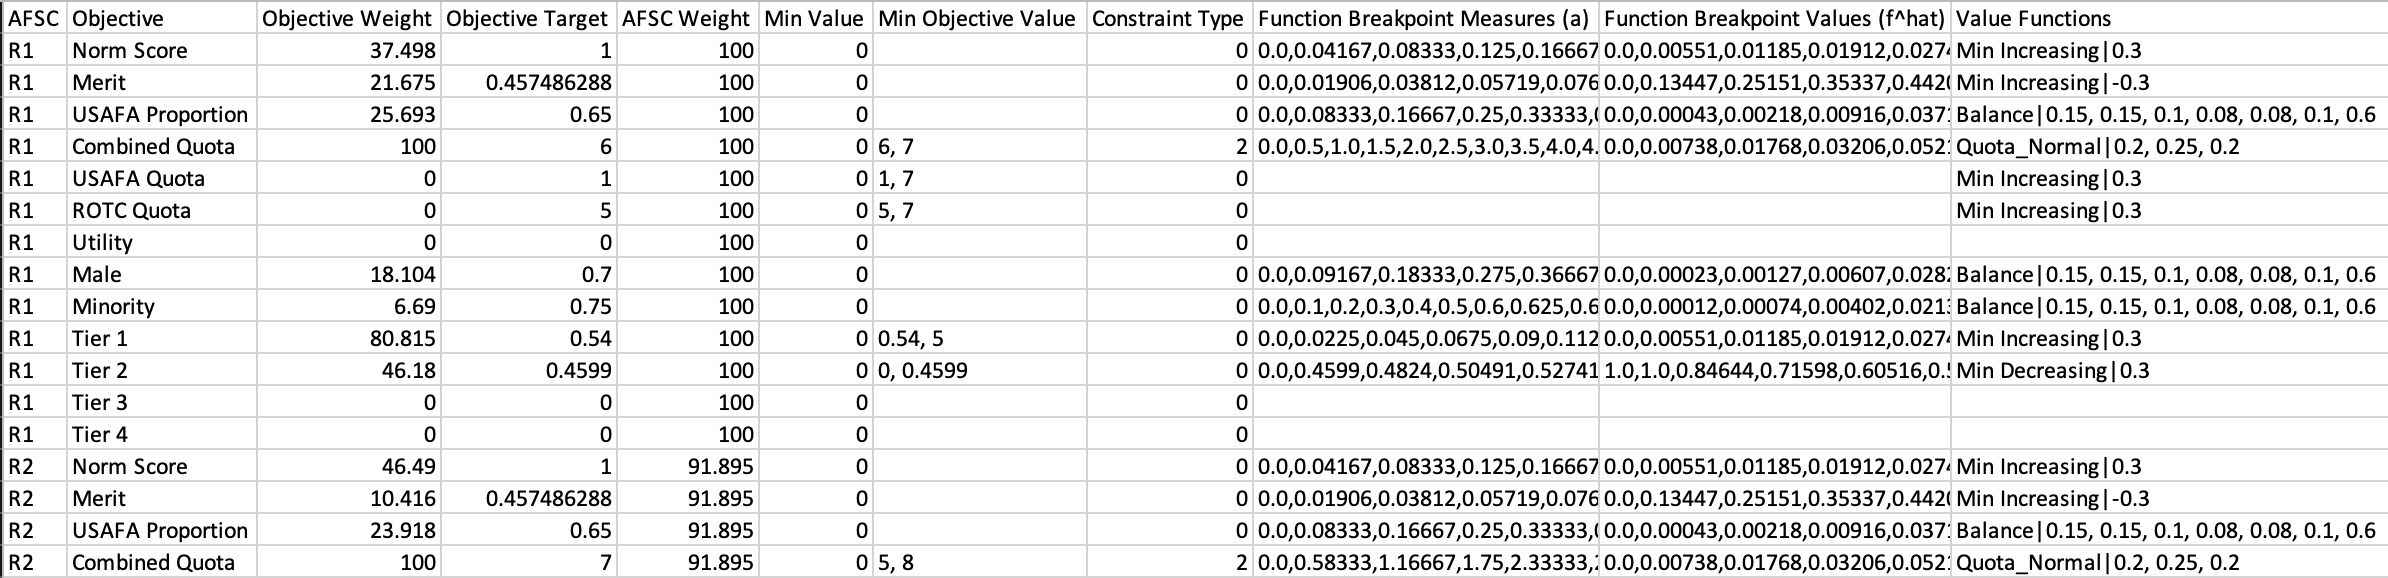

As you can see, this file structure has a row for every AFSC and objective pair. The dataframes shown above are flattened into columns and exist here. Again, these are the actual value parameters used for the problem instance, since the "Defaults" could have been more generalized (they aren't here since we exported our randomly generated set as defaults, therefore having it be the same thing as what you're seeing here). For a real class you could simply take the previous years defaults, tweak them a bit if needed, and import those as a starting point for a new class year. The objective targets would be updated to reflect the information of the problem instance you're looking at (the USAFA proportion objective target would be the proportion of the USAFA cadets of the instance you're solving, for example).

The "AFSC Weight" and "Min Value" columns above pertain to the AFSC itself, not the AFSC-objective pair like the others (which is why "AFSC Weight" is all 100s for R1). The three columns to the right pertain to the value functions used for each AFSC and objective which I will discuss in more detail in the following section.

#### Value Functions

In [ ]:
dfs["Value Functions"]

Here we have the value functions for each of the AFSC objectives. These definitely require some explaining. I've created my own terminology so that they can be generalized and constructed into actual value functions for each of the objectives. I have an excel file that outlines how these functions are created and what they look like (Value_Function_Builds.xlsx), but I will also detail them here. 

In [ ]:
# I need to import this script
import afccp.core.data.values

Before you read this next section on the value functions, please look at my slides in "VFT_Model_Slides.pptx" (located in the docs folder). Navigate to the "Creating Value Functions" section (starts on slide 130), and just click through them. This is how I construct the value functions, and this should help your understanding of the different piece-wise "segments" used.

The purpose of the "vf_string" (Value Function string) is to construct the "segment_dict" (Segment Dictionary) which provides the coordinates for the main piece-wise value function segment breakpoints. As illustrated below, there are four "segments" of exponential functions that are pieced together using "breakpoints". There are therefore 5 breakpoints. For this example, they are at the coordinates (0, 0), (3, 0.5), (5, 1), (7, 0.5), and (10, 0). This would compose the "segment_dict". 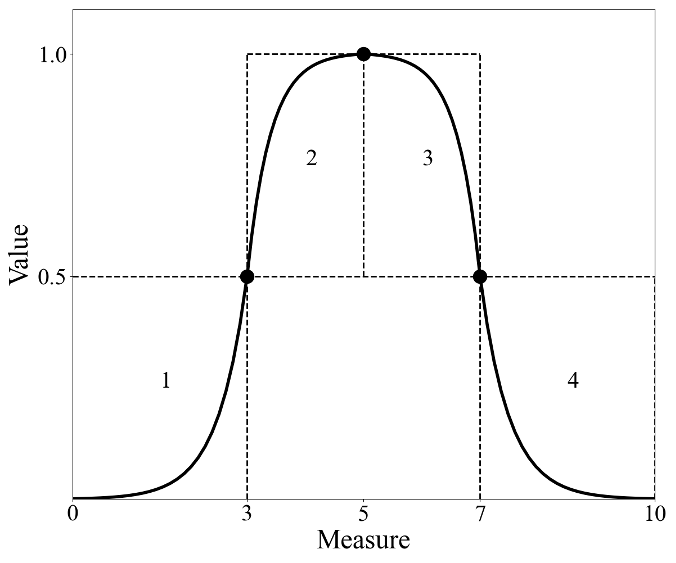

Let's illustrate the "Balance" value function. It takes several inputs pertaining to the "margins" and the $\rho$ parameters. Here is what it looks like:

vf_string $=$ "Balance|left_base_margin, right_base_margin, $\rho_1$, $\rho_2$, $\rho_3$, $\rho_4$, margin_y"

Honestly, you really don't need to worry about what these all mean. The only thing you should focus on is the $\rho$ ("rho") parameters. These control how steep each of the exponential segments are. Let's see an example. We'll first generate the "segment_dict" based on the "vf_string"

In [ ]:
vf_string = "Balance|0.2, 0.2, 0.1, 0.08, 0.08, 0.1, 0.5"
target = 0.5
actual = 0.5
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target, actual=actual)
for segment in segment_dict:
    print(str(segment) + ":", segment_dict[segment])

Now we have our segment dictionary! We know what the coordinates for the "main" breakpoints are, so we can now generate the rest of the breakpoints to make the function linear. Let's calculate the x and y coordinates of our function's breakpoints.

In [ ]:
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=20)
print("x:", x, "\n\n", "y:", y)

Now we plot our value function!

In [ ]:
# "Balance" type of value function!
from afccp.core.visualizations.charts import ValueFunctionChart
chart = ValueFunctionChart(x, y)

And there we have it. This is the value function we've constructed from that initial "vf_string". Play around with the different parameters and see what happens here!

In [ ]:
# Change this
vf_string = "Balance|0.2, 0.2, 0.1, 0.08, 0.08, 0.1, 0.5"
target = 0.5  # This is what we're after
actual = 0.5  # This is essentially what we could realistically expect (based on set of eligible cadets)
num_breakpoints = 200  # How many breakpoints to use 
# (the more breakpoints used, the more the function appears non-linear)

# Don't change this
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target, actual=actual)
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=num_breakpoints)
chart = ValueFunctionChart(x, y)

That is the "Balance" value function type. This is intended for the objectives that seek to "balance" certain characteristics of the cadets (USAFA/Male/Minority proportions and sometimes Merit as well). I did end up changing the Merit value function to be a "Min Increasing" because I decided against penalizing the objective for exceeding 0.5. At this point, I will note that these value functions don't necessarily have to have 4 segments. I do have value function types that use 3, 2, or even 1 segment. Let's discuss the quota value functions.

"Quota_Direct" is intended for AFSCs that have a range on the number of cadets that are to be assigned, but also know around where they'd like to fall within that range. There are 6 parameters, the $\rho$ (rho) parameters for each of the four segments, and the y values for the two breakpoints on either side of the "peak". The vf_string is then: "Quota_Direct|$\rho_1$, $\rho_2$, $\rho_3$, $\rho_4$, $y_1$, $y_2$". The additional AFSC specific parameters are the upper/lower bounds on the number of cadets as well as the actual target number of cadets within that range. Here is an example:

In [ ]:
vf_string = "Quota_Direct|0.1, 1, 0.6, 0.1, 0.8, 0.8"
minimum = 120  # Lower Bound
maximum = 200  # Upper Bound
target = 140  # Desired number of cadets within the range
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target, 
                                                                      minimum=minimum, maximum=maximum)
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=num_breakpoints)
chart = ValueFunctionChart(x, y)

Here you can see that although the range of 120 to 200 is specified, there is a direction of preference within that range (the AFSC wants around 140 cadets, but is fairly accepting of values around that range). I will note that the target, minimum, and maximum parameters are taken from the "Random_1 AFSCs.csv" data!

Another value function we can choose for the quota objective is the "Quota_Normal" function type. This is intended for AFSCs that either don't care about the number of cadets (as long as they fall within a certain range) or didn't specify. For example, the PGL says 120 and after speaking with them we determine the upper bound is 200 and they say they have no preference between 120 and 200 and everything in between. There are 2 segments for this function, connected by a horizontal line at y = 1 for the range on the cadets. The function parameters are $\rho_1$, $\rho_2$, and "domain_max" which is the max number of cadets that could have a nonzero value (arbitrary scalar just to get a curve on the right side of the function). Here is the vf_string: "Quota_Normal|d_max, $\rho_1$, $\rho_2$". Here is an example:

In [ ]:
vf_string = "Quota_Normal|0.2, 0.25, 0.05"
minimum = 120  # Lower Bound
maximum = 200  # Upper Bound
target = 140  # (Doesn't matter here)
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target, 
                                                                      minimum=minimum, maximum=maximum)
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=num_breakpoints)
chart = ValueFunctionChart(x, y)

The last two kinds of value functions I'll discuss are the "Min Increasing" and "Min Decreasing" types. They are very simple and only have one segment which is a simple exponentional curve to get to the target measure (in the x space). The only parameter is $\rho$. The vf_string then looks like: "Min Increasing|$\rho$" or "Min Decreasing|$\rho$". They are called "Min" functions because it's essentially the same thing as taking the minimum value between some exponential curve and 1. Here are some examples:

In [ ]:
vf_string = "Min Increasing|0.1"
target = 0.5
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target)
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=num_breakpoints)
chart = ValueFunctionChart(x, y)

In [ ]:
vf_string = "Min Increasing|-0.1"
target = 1
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target)
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=num_breakpoints)
chart = ValueFunctionChart(x, y)

In [ ]:
vf_string = "Min Decreasing|-1"
target = 0.2
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target)
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=num_breakpoints)
chart = ValueFunctionChart(x, y)

In [ ]:
vf_string = "Min Decreasing|1"
target = 0.2
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.data.values.create_segment_dict_from_string(vf_string, target=target)
x, y = afccp.core.data.values.value_function_builder(segment_dict=segment_dict, num_breakpoints=num_breakpoints)
chart = ValueFunctionChart(x, y)

And there you have it! This is how I code up and construct my many value functions for each of the objectives for each of the AFSCs. Please reach out if you have any questions as I know this is a confusing section.

Now that we're done discussing the types of value functions, we can take a look at the actual value functions used on "Random_1". We're plotting the breakpoints (x/y coordinates) for a specific AFSC objective value function. Here is an example:

In [ ]:
# Plot the value function (this also saves it to the "Value Functions" sub-folder by default FYI)
c = instance.show_value_function({'afsc': "R1", 'objective': 'Combined Quota'})

In [ ]:
# Plot the value function (this also saves it to the "Value Functions" sub-folder by default FYI)
c = instance.show_value_function({'afsc': "R2", 'objective': 'USAFA Proportion'})

In [ ]:
# Plot the value function (this also saves it to the "Value Functions" sub-folder by default FYI)
c = instance.show_value_function({'afsc': "R1", 'objective': 'Tier 1'})

#### Global Utility

There are a few other components of the "value parameters" that I haven't mentioned yet. The "global_utility" matrix is based on the cadets' preferences as well as the AFSCs' preferences. The two matrices "cadet_utility" and "afsc_utility" are merged according to the overall weights on the cadets/AFSCs.

In [ ]:
# Cadet Utility Matrix
p['cadet_utility']

In [ ]:
# AFSC Utility Matrix
p['afsc_utility']

In [ ]:
# Overall weights on cadets/AFSCs
print("weight on cadets:", round(vp['cadets_overall_weight'], 2))
print("weight on AFSCs:", round(vp['afscs_overall_weight'], 2))

In [ ]:
# Global Utility Matrix (Each cell is the weighted sum of cadet/AFSC utility)
vp['global_utility']  # Extra column is for the unmatched cadets!

In [ ]:
print("Cadet 0's utility on AFSC 0:", p['cadet_utility'][0, 0])
print("AFSC 0's utility on cadet 0:", p['afsc_utility'][0, 0])
print("Global Utility[0, 0]:", round(vp['cadets_overall_weight'], 2), "*", p['cadet_utility'][0, 0], "+", 
     round(vp['afscs_overall_weight'], 2), "*", p['afsc_utility'][0, 0], "=", vp['global_utility'][0, 0])

The global utility matrix is unique to each set of value parameters (since you can toggle the weights on cadets/AFSCs and get a different matrix). This matrix lives at "Random_1 VP Global Utility.csv".

#### Cadet Utility Constraints (Meant just for AFPC/DSYA through an operational lens)
Another component of the value parameters is the cadet utility constraints. These constraints ensure certain cadets receive some minimum utility value, and the implication here usually applies to the top 10% of cadets as my method of preventing as much of the "adjudication" piece on the backend. Built into the classification process is adjudication where the sources of commissioning get to review the results prior to release and make adjustments as needed. One thing they always want to make sure is that their top cadets are getting something they want, and if they aren't they'll kick it back to AFPC to fix. I can use the cadet utility constraints to ensure that the top 10% of cadets receive one of their top 3 choices, or there is a good reason why they aren't getting one (if they only have very competitive AFSCs as their top 3 choices and don't rank high enough for them then that may cause problems). 

These constraints live in the file "Random_1 Cadets Utility Constraints.csv"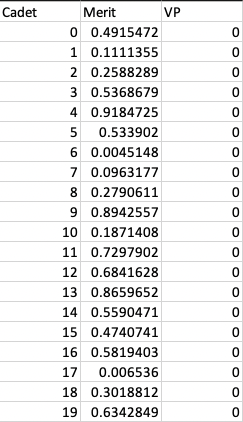

As you can see, I include the cadet indices (as I've said before, it's because I like referring to cadets by their indices in the numpy arrays since that allows me to do a lot of things) as well as the cadets' order of merit. This information gives more context to why certain cadets have constrained minimum values versus other cadets! The "VP" column is the actual constrained minimum utilities for all of the cadets. If you have a second set of value parameters that you're using, there would be another column called "VP2". As you can see, the default is to keep all of the cadets unconstrained. I've thought a lot about how this should work and wrestled with the idea of just making a function to go through and constrain the top 10% to get a utility value greater than or equal to their third choice but ultimately decided against it. The reason is that it's more complicated then that and I firmly believe the AFPC/DSYA analyst needs to be the one to do it manually. 

When I ran this for FY23 and FY24, I tuned the model parameters to be what I needed them to be based on everyone's wants and desires and then solved it initially without any cadet constraints. I can then look at the solution at the top 10/20% of the class and if the cadet is receiving a top 3 preference anyway (vast majority do), then I constrain their utilities to be whatever their third choice utility was. I then filter on the people who aren't getting a top 3 preference. If the reason is just because the optimal solution involved this cadet not getting a top 3 preference, and they really should have received one based on preferences (they didn't have 3 very hard choices to meet), then I also enforce the utility constraint. If there's a clear reason why they're getting their fourth choice (and I mean a VERY justifiable reason), then I constrain them to their fourth choice utility. For top 10%, I don't think this happened at all but did occur for top 20%.

In [ ]:
# Cadet utility constriants
vp['cadet_value_min']  # Defaults to 0! For an example problem (not real class year), don't mess with this

#### Goal-Programming Parameters

One final input file that I haven't mentioned is "Random_1 Goal Programming.csv". These are the inputs that another AFIT researcher, former Lt. Rebecca Reynolds (now Capt. Rebecca Eisemann), used for her goal-programming model. My intent for "afccp" has always been to provide a way for researchers in this field to contribute to this "academic" problem and try new things to inspire innovation for AFPC/DSYA. For her goal programming model, her inputs are structured in this way: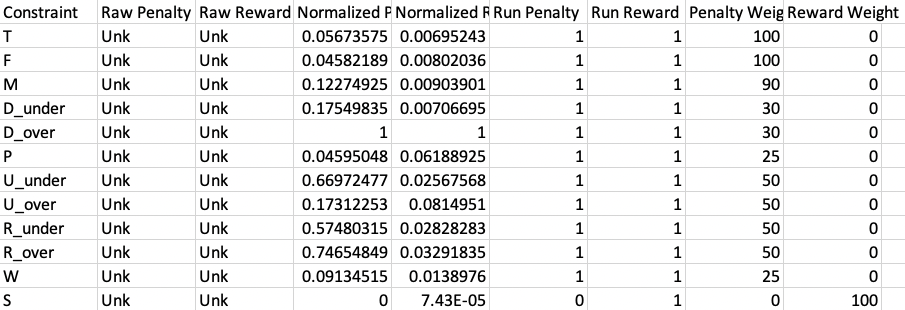

In order to get the penalty/reward terms here we need to run the model on the specific class year to tune the parameters to get the actual parameters needed to run the full goal programming model. It's a little nuanced and you can certainly view her thesis here: https://scholar.afit.edu/etd/5449/. I will briefly cover her model a little more later on.

### Data Methods

Now that I've described in detail the data that afccp uses, let's talk about the data-manipulation methods available for the CadetCareerProblem class. For a "Random" generated problem set, it doesn't really matter what you do to the data which is why I created a convenient "instance.fix_generated_data()" function that gets your generated data looking right for you to run models/algorithms to solve. Many of the components of that function are also relevant for a real class year, but not all!

In [ ]:
# Takes the CIP codes and translates them to the qualification matrix (only works for real data)
instance.calculate_qualification_matrix()

As you can see, the code above produces an error since we don't have any CIP codes in "Random_1 Cadets.csv". Going further, even if we did put them into our dataset it still wouldn't work since the AFSCs themselves are also meaningless. This function only works with real AFSC names and with CIP codes in our cadets data. As an aside, I've tried to incorporate a lot of error handling throughout afccp but it's certainly not flawless and still a work in progress so if you encounter something that doesn't make since please let me know and I will a) help you fix it and also b) include some more error handling measures so we catch that kind of error in a manner that makes more sense to the analyst using afccp.

#### Operational Data Processing (Meant just for AFPC/DSYA)

The intent of this section is primarily for the "operational lens" of this problem, since we have the easy method I've already described that will fix the fake data for you anyway: instance.fix_generated_data(). 

Ok, your main job for processing a given class year of cadets is to construct the "Cadets.csv", "AFSCs.csv" and "AFSCs Preferences.csv", and the default value parameters excel file located in the support sub-folder. Additionally, to create the AFSC preferences for Rated career fields, you'll also need the "ROTC Rated OM.csv" and "USAFA Rated OM.csv" files. "AFSCs Preferences.csv" should contain the necessary rankings for Non-Rated AFSCs, with something as a placeholder for rated career field rankings. The two OM datasets should have the percentiles for their respective source of commissioning cadets that are rated eligible (they volunteered). If a cadet volunteered for Rated, and is eligible for at least one of the rated AFSCs, they should be in this dataset. If the cadet is not eligible for a specific rated AFSC, they have a "0" in that position. The important thing here is that the cadets can be sorted in descending order with highest ranking at the top and lowest at the bottom using those "percentile" values (1, 0.99, 0.98, ..., 0.01, 0, 0, etc.). This is what the code does to get the ordered list of cadets (AFSC preferences). 

In [ ]:
# Takes the two Rated OM datasets and re-calculates the AFSC rankings for Rated AFSCs for both SOCs
instance.construct_rated_preferences_from_om_by_soc()

In [ ]:
instance.parameters['a_pref_matrix']  # Nothing will change here since we already had this merged correctly

Once this method is run, we should now have an "a_pref_matrix" that is almost 100% accurate (the only drift should come from cadet preferences). Once you have the AFSC preferences file that is accurate, you can then update the qualification matrix using these preferences. The default qual matrix allows all cadets to be eligible for rated AFSCs and for the Space Force in general. It also restricts eligbility for Non-Rated AFSCs to be based on the cadets' degrees (CIP codes). We need to update it by restricting Rated/USSF eligibility down to volunteerism, and relaxing the AFOCD a bit for Non-Rated AFSCs (creating "exceptions" designated by "E"). This accomplished through this method:

In [ ]:
# Update qualification matrix from AFSC preferences (treating CFM lists as "gospel" except for Rated/USSF)
instance.update_qualification_matrix_from_afsc_preferences()

The message above isn't actually doing anything since those cadets were already ineligible since we've run the "instance.fix_generated_data()" function earlier.

Now, we should have a qualification matrix that agrees with the AFSC preference matrix in terms of eligibility. If it didn't, it would warn you and tell you where the discrepancies are so you can correct them or ignore them depending on what's going on. Once these two matrices are rectified, it's time to remove AFSCs from the cadets' preferences if they're truly ineligible for some career field. Be careful with this one as you need to make sure that the AFSC preferences and the qual matrix reflects accurate eligibility as this will remove cadets' choices! 

It checks all three "sources of truth" in terms of eligibility (cadet/AFSC preferences and degree qual matrix) and if one of them says that the cadet is ineligible for a given AFSC, this method forces all three to reflect ineligibility. It is a rather "nuclear" approach, so again, be careful!

In [ ]:
# Removes ineligible cadets from all 3 matrices: degree qualifications, cadet preferences, AFSC preferences
instance.remove_ineligible_choices()  # Nothing changed since we've already done this!

This method also re-runs the parameter additions function which will correct the preference lists themselves (the dictionaries for each cadet/AFSC "key" that has the sorted AFSCs/cadets list as the "value"). Just always remember the difference between "a_pref_matrix" and "afsc_preferences" (similarly, "c_pref_matrix" and "cadet_preferences"). One is a 2-dimensional numpy array and the other is a dictionary. 

From here, we want to "fill the gaps" in the matrix to create the final 1-N lists. We use the preference dictionaries ("afsc_preferences" and "cadet_preferences") to construct their corresponding matrices from scratch.

In [ ]:
# Take the preferences dictionaries and update the matrices from them (using cadet/AFSC indices)
instance.update_preference_matrices()  # 1, 2, 4, 6, 7 -> 1, 2, 3, 4, 5 (preference lists need to omit gaps)

Once we have the final AFSC rankings, we can construct the afsc_utility matrix (that lives in "AFSCs Utility.csv") that converts the 1-N preference list into linear percentiles.

In [ ]:
# Convert AFSC preferences to percentiles (0 to 1)
instance.convert_afsc_preferences_to_percentiles()  # 1, 2, 3, 4, 5 -> 1, 0.8, 0.6, 0.4, 0.2

Until now, we've only been manipulating the cadet/AFSC preference matrices (information contained in "Cadets Preferences.csv" and "AFSC Preferences.csv"). We haven't adjusted the information from "Cadets.csv", since preferences are also contained there. 

In [ ]:
# The "cadet columns" are located in Cadets.csv and contain the utilities/preferences in order of preference
instance.update_cadet_columns_from_matrices()  # We haven't touched "c_preferences" and "c_utilities" until now

One last thing you'll want to do is update the utility matrices for cadets from the cadets data. These are the "utility" and "cadet_utility" matrices that live in "Cadets Utility.csv" and "Cadets Utility (Final).csv", respectfully.

In [ ]:
instance.update_cadet_utility_matrices_from_cadets_data()

The methods I've just described all contribute to the main parameters ("parameters") of the problem. The only other thing I've alluded to is getting the default value parameters setup in the "support/value parameters defaults/" sub-folder. We created this file earlier with the "Random_1" instance by exporting the randomly generated set back to excel as defaults, so it's there for reference with the name "Value_Parameters_Defaults_Random_1.xlsx". The best way to do this for a real class year is to simply copy the previous year's default file and make adjustments as needed. I did the heavy lifting for incorporating Rated/USSF with 2024 and so the 2025 file should be pretty similar, for example.

Once you create that default file, you'll just need to import your value parameters as defaults and it will initialize them for your given class year from that file. This should be one of the very first things you do because my code relies on the value parameters extensively. 

In [ ]:
# Execute that function to get your set of value parameters
v = instance.import_default_value_parameters()  # "v =" prevents a lot of output (v is meaningless)

For a real class year, if you followed those steps I described above then you should have all your files good to go and can start thinking about getting solutions! This was by far the biggest section since the data is definitely the most critical component of this process to get right. If you understand the data, and have processed it all correctly, then solving the model and getting a solution is as easy as hitting "go" with whatever algorithm/model you're using.

### Summary

This section described, in detail, the data used as part of afccp. There is a lot of it, and depending on your role in this project you'll probably need to know what most of it is and where it's stored. To recap, all of the instance files that contain the data are located in the "Model Input" folder of a particular problem instance. They are pulled into afccp using pandas and extracted into numpy arrays that live in the dictionaries "parameters" and "value_parameters". These dictionaries are attributes of the CadetCareerProblem (instance) object. Many new arrays, sets, and subsets are created through various afccp functions based on this data ("I^E", for example, is the indexed set of all eligible cadets for each AFSC). 

Below is the recommended way of processing data with afccp after you've already run through all the pre-processsing steps I've described previously (fixing the data).

In [ ]:
# Import the "Random_1" instance
instance = CadetCareerProblem('Random_1')

# "Activate" a particular set of value parameters (since you can have multiple)
instance.set_value_parameters("VP")  # There could be "VP", "VP2", "VP3", etc.

# In case you change some parameter that the value parameters depend on
instance.update_value_parameters()  # AFSC quotas are a good example here

# Always make sure your data is good to go!
instance.parameter_sanity_check()

# Do stuff here
pass

# Export back to excel. If you just want the solutions (when you get them), use optional argument below
instance.export_data()  # datasets="Solutions" for just exporting solutions

## Data

A "CadetCareerProblem" instance comes with a lot of data, and so the largest section of this tutorial is here to talk about that data. I'll outline where the data is coming from (the various csvs), how the data is captured within the CadetCareerProblem class, and where the code is that manages all of it. 

### afccp.core.data

The "data" module of afccp.core contains the scripts and functions that all have something to do with processing the many sets and parameters of the problem. At a high level the modules are setup like this:

## Solutions

As you've seen, afccp requires a substantial amount of data in order to work. All the various parameters, value parameters, hyper-parameters, and other "controls" are necessary to determine the best solution assignment of cadets to AFSCs. This is the whole point of afccp: obtain the right solution! This section of the tutorial contains the information needed for you to work with afccp to determine the solution 

## Visualizations

Overview of the visualizations module

In [1]:
# TEMPORARY HERE TO AVOID RE-RUNNING EVERYTHING ABOVE 
# (Just to help me as I keep writing this tutorial)
import numpy as np
import pandas as pd
import os

# Obtain initial working directory
dir_path = os.getcwd() + '/'
print('initial working directory:', dir_path)

# Get main afccp folder path
index = dir_path.find('afccp') 
dir_path = dir_path[:index + 6]

# Update working directory
os.chdir(dir_path)
print('updated working directory:', dir_path)

# Import module and data
from afccp.core.main import CadetCareerProblem
instance = CadetCareerProblem("Random_1")
instance.set_value_parameters()

# Shorthand
p, vp = instance.parameters, instance.value_parameters


initial working directory: /Users/griffenlaird/Desktop/Coding Projects/afccp/examples/
updated working directory: /Users/griffenlaird/Desktop/Coding Projects/afccp/
Importing 'afccp' module...
Pyomo module found.
SDV module found.
Sklearn Manifold module found.
Python PPTX module found.
Importing 'Random_1' instance...
Instance 'Random_1' initialized.
